In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_11-08-20_J1J2J3J4/'
results_foldername = 'J1J2J3J4Comparison'


filenamelist = ['J1J2J3_folder/backup',
               'J1J2J3J4_folder/backup']

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [10]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

print(J3)
print(J4)
s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])

kw = {'binning': True, 'plzplot': False, 'plotmin': 0, 'plotmax': 16}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[0.003248, 0.003248]
[0.0, 0.001403]
nb  [128, 128] num_in_bin  [32, 32]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
[-0.66515389]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
[-0.66524464]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]


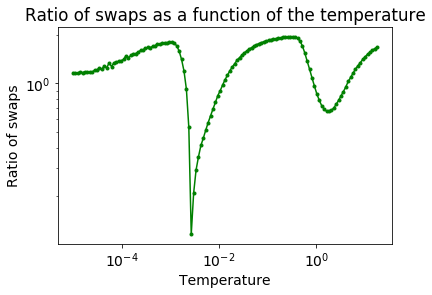

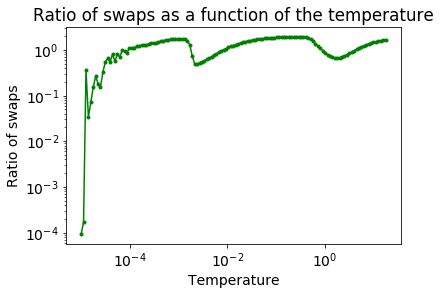

In [6]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

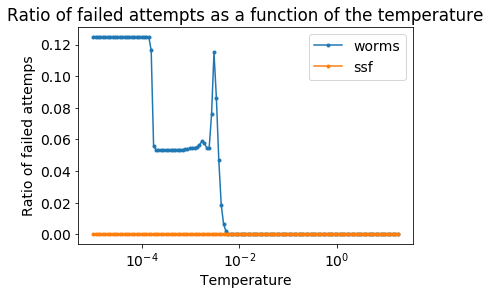

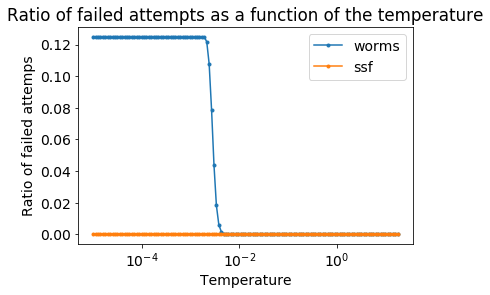

In [7]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

In [8]:
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy

Verifying that the low temperatures of file  J1J2J3_folder/backup correspond to the ground state.
Phase 1:  Problem!!
Phase 2:  False
Phase 3:  Problem!!
Phase 4:  Problem!!
Phase 5:  False
Phase 6:  False
Phase 7:  False
Phase 8:  False
Phase 9:  False
Phase 10:  False
Phase 11:  False
Verifying that the low temperatures of file  J1J2J3J4_folder/backup correspond to the ground state.
Phase 1:  Problem!!
Phase 2:  False
Phase 3:  Problem!!
Phase 4:  Problem!!
Phase 5:  False
Phase 6:  False
Phase 7:  False
Phase 8:  False
Phase 9:  False
Phase 10:  False
Phase 11:  False


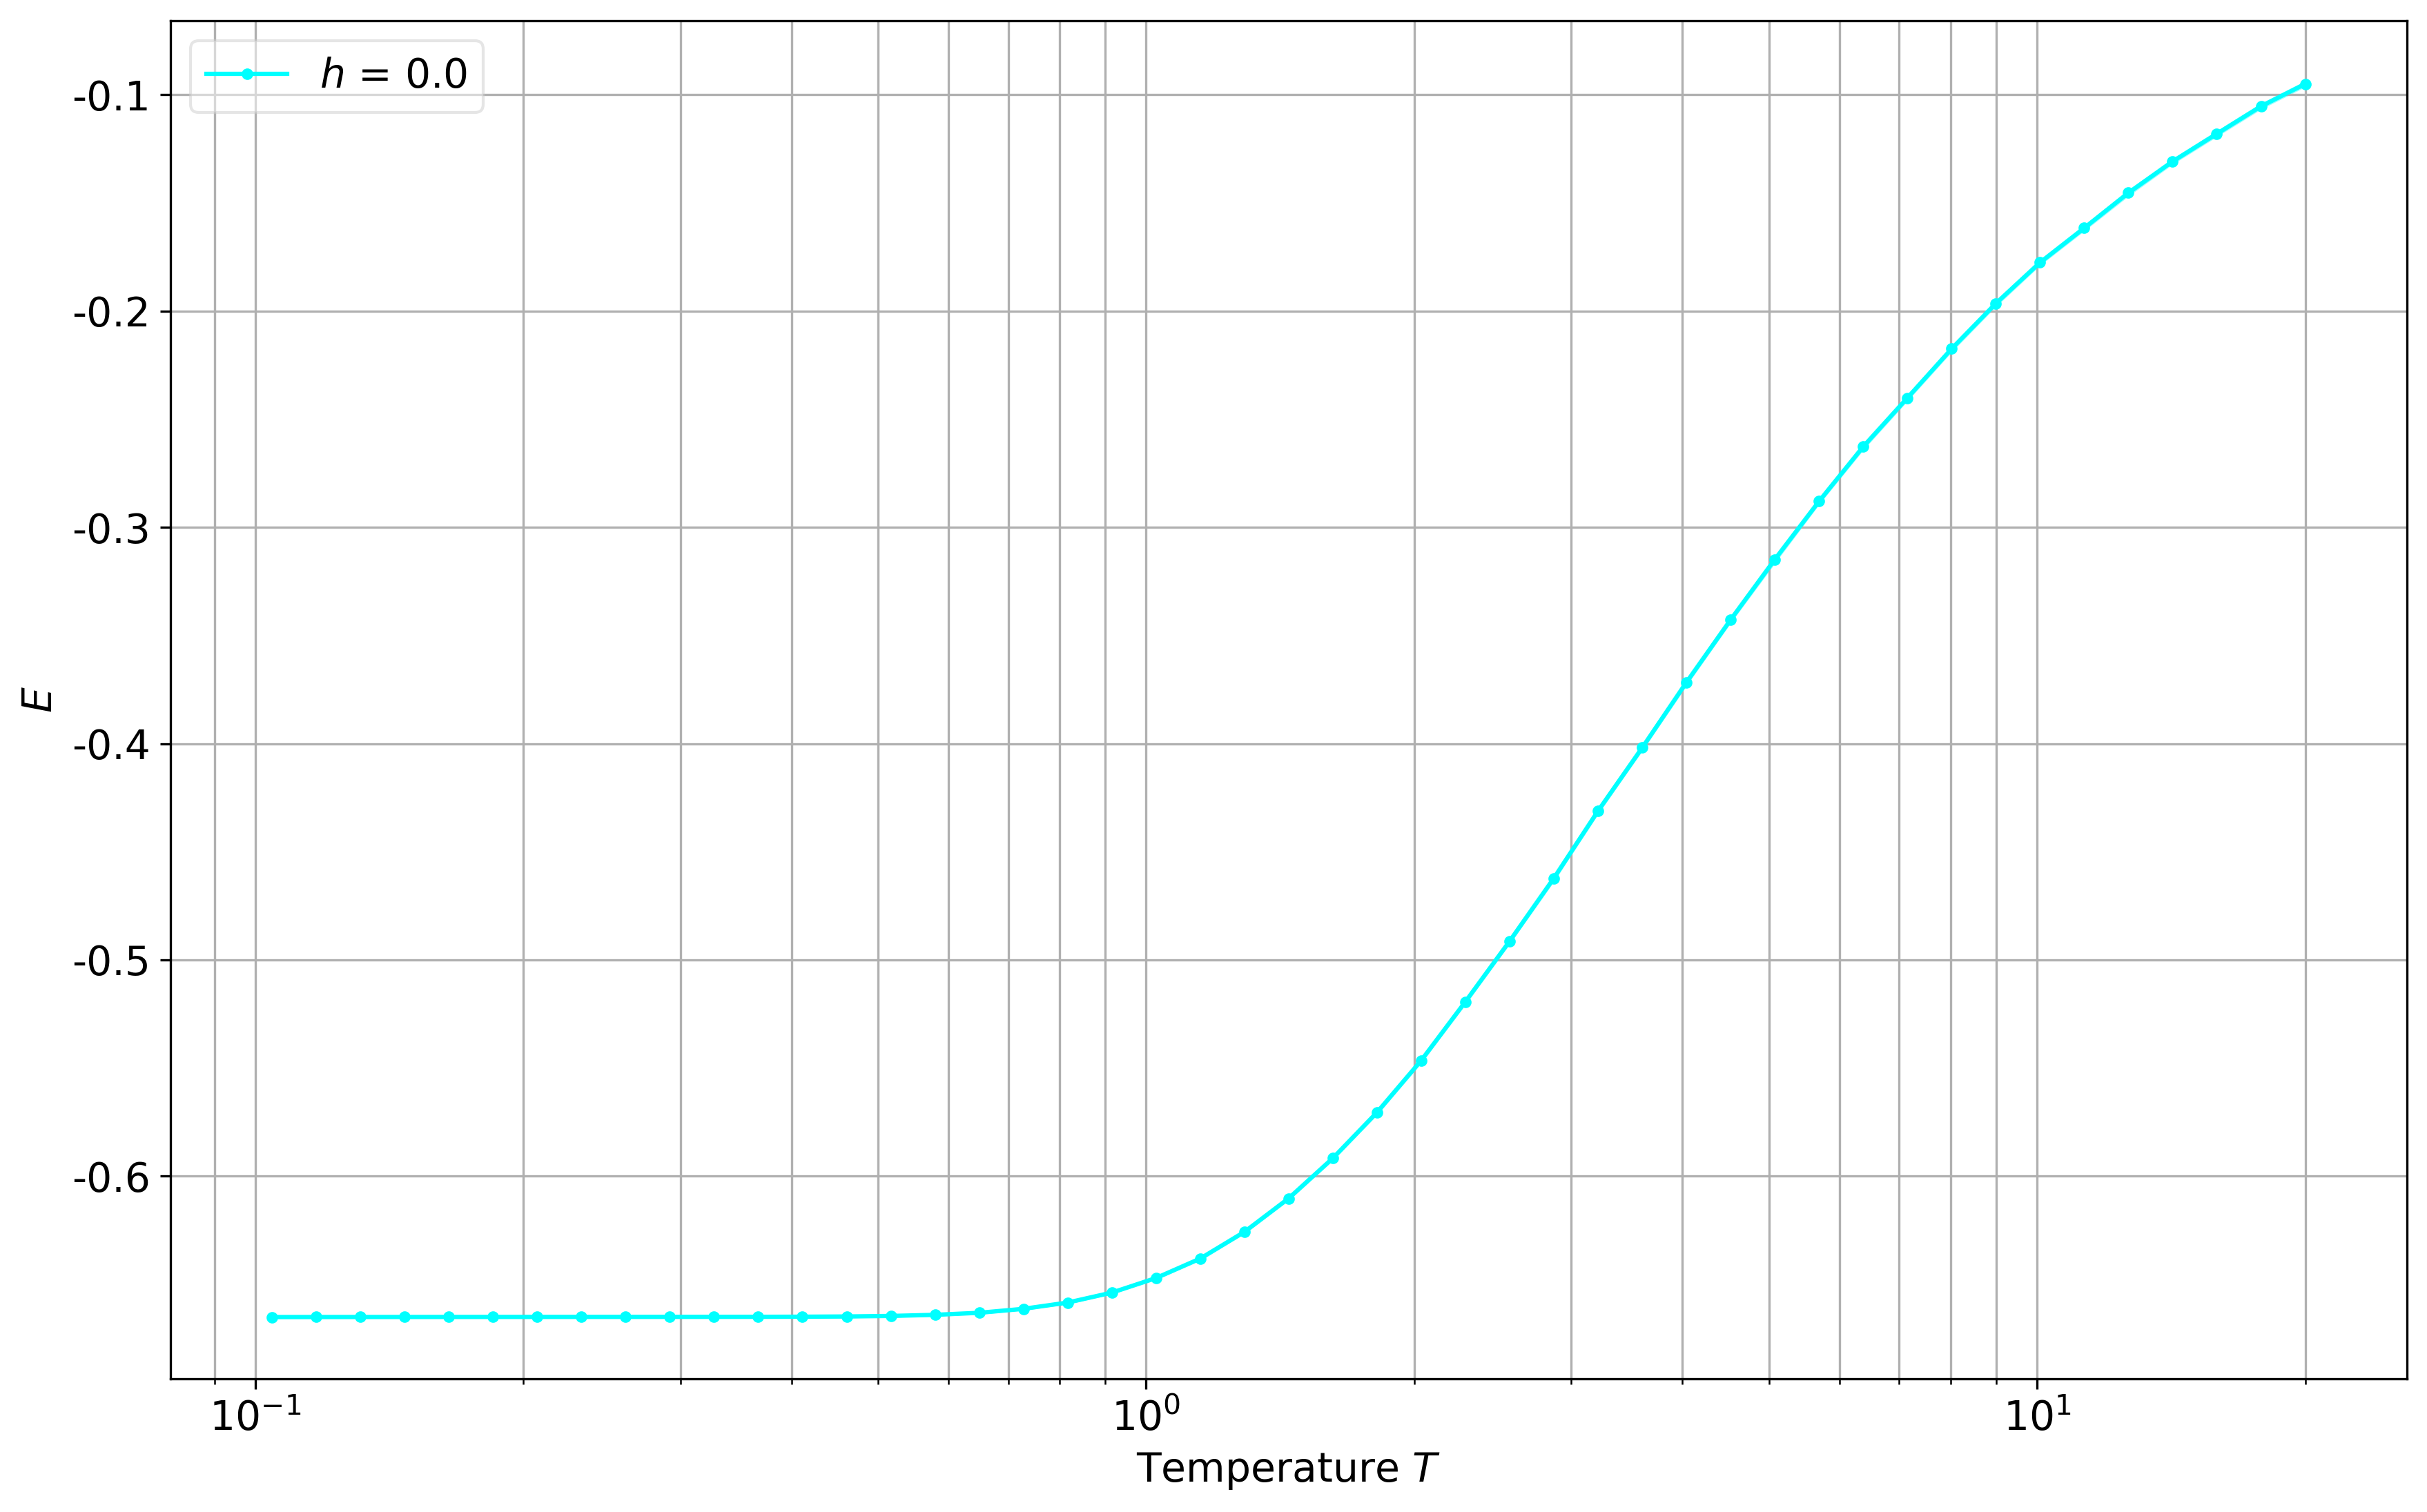

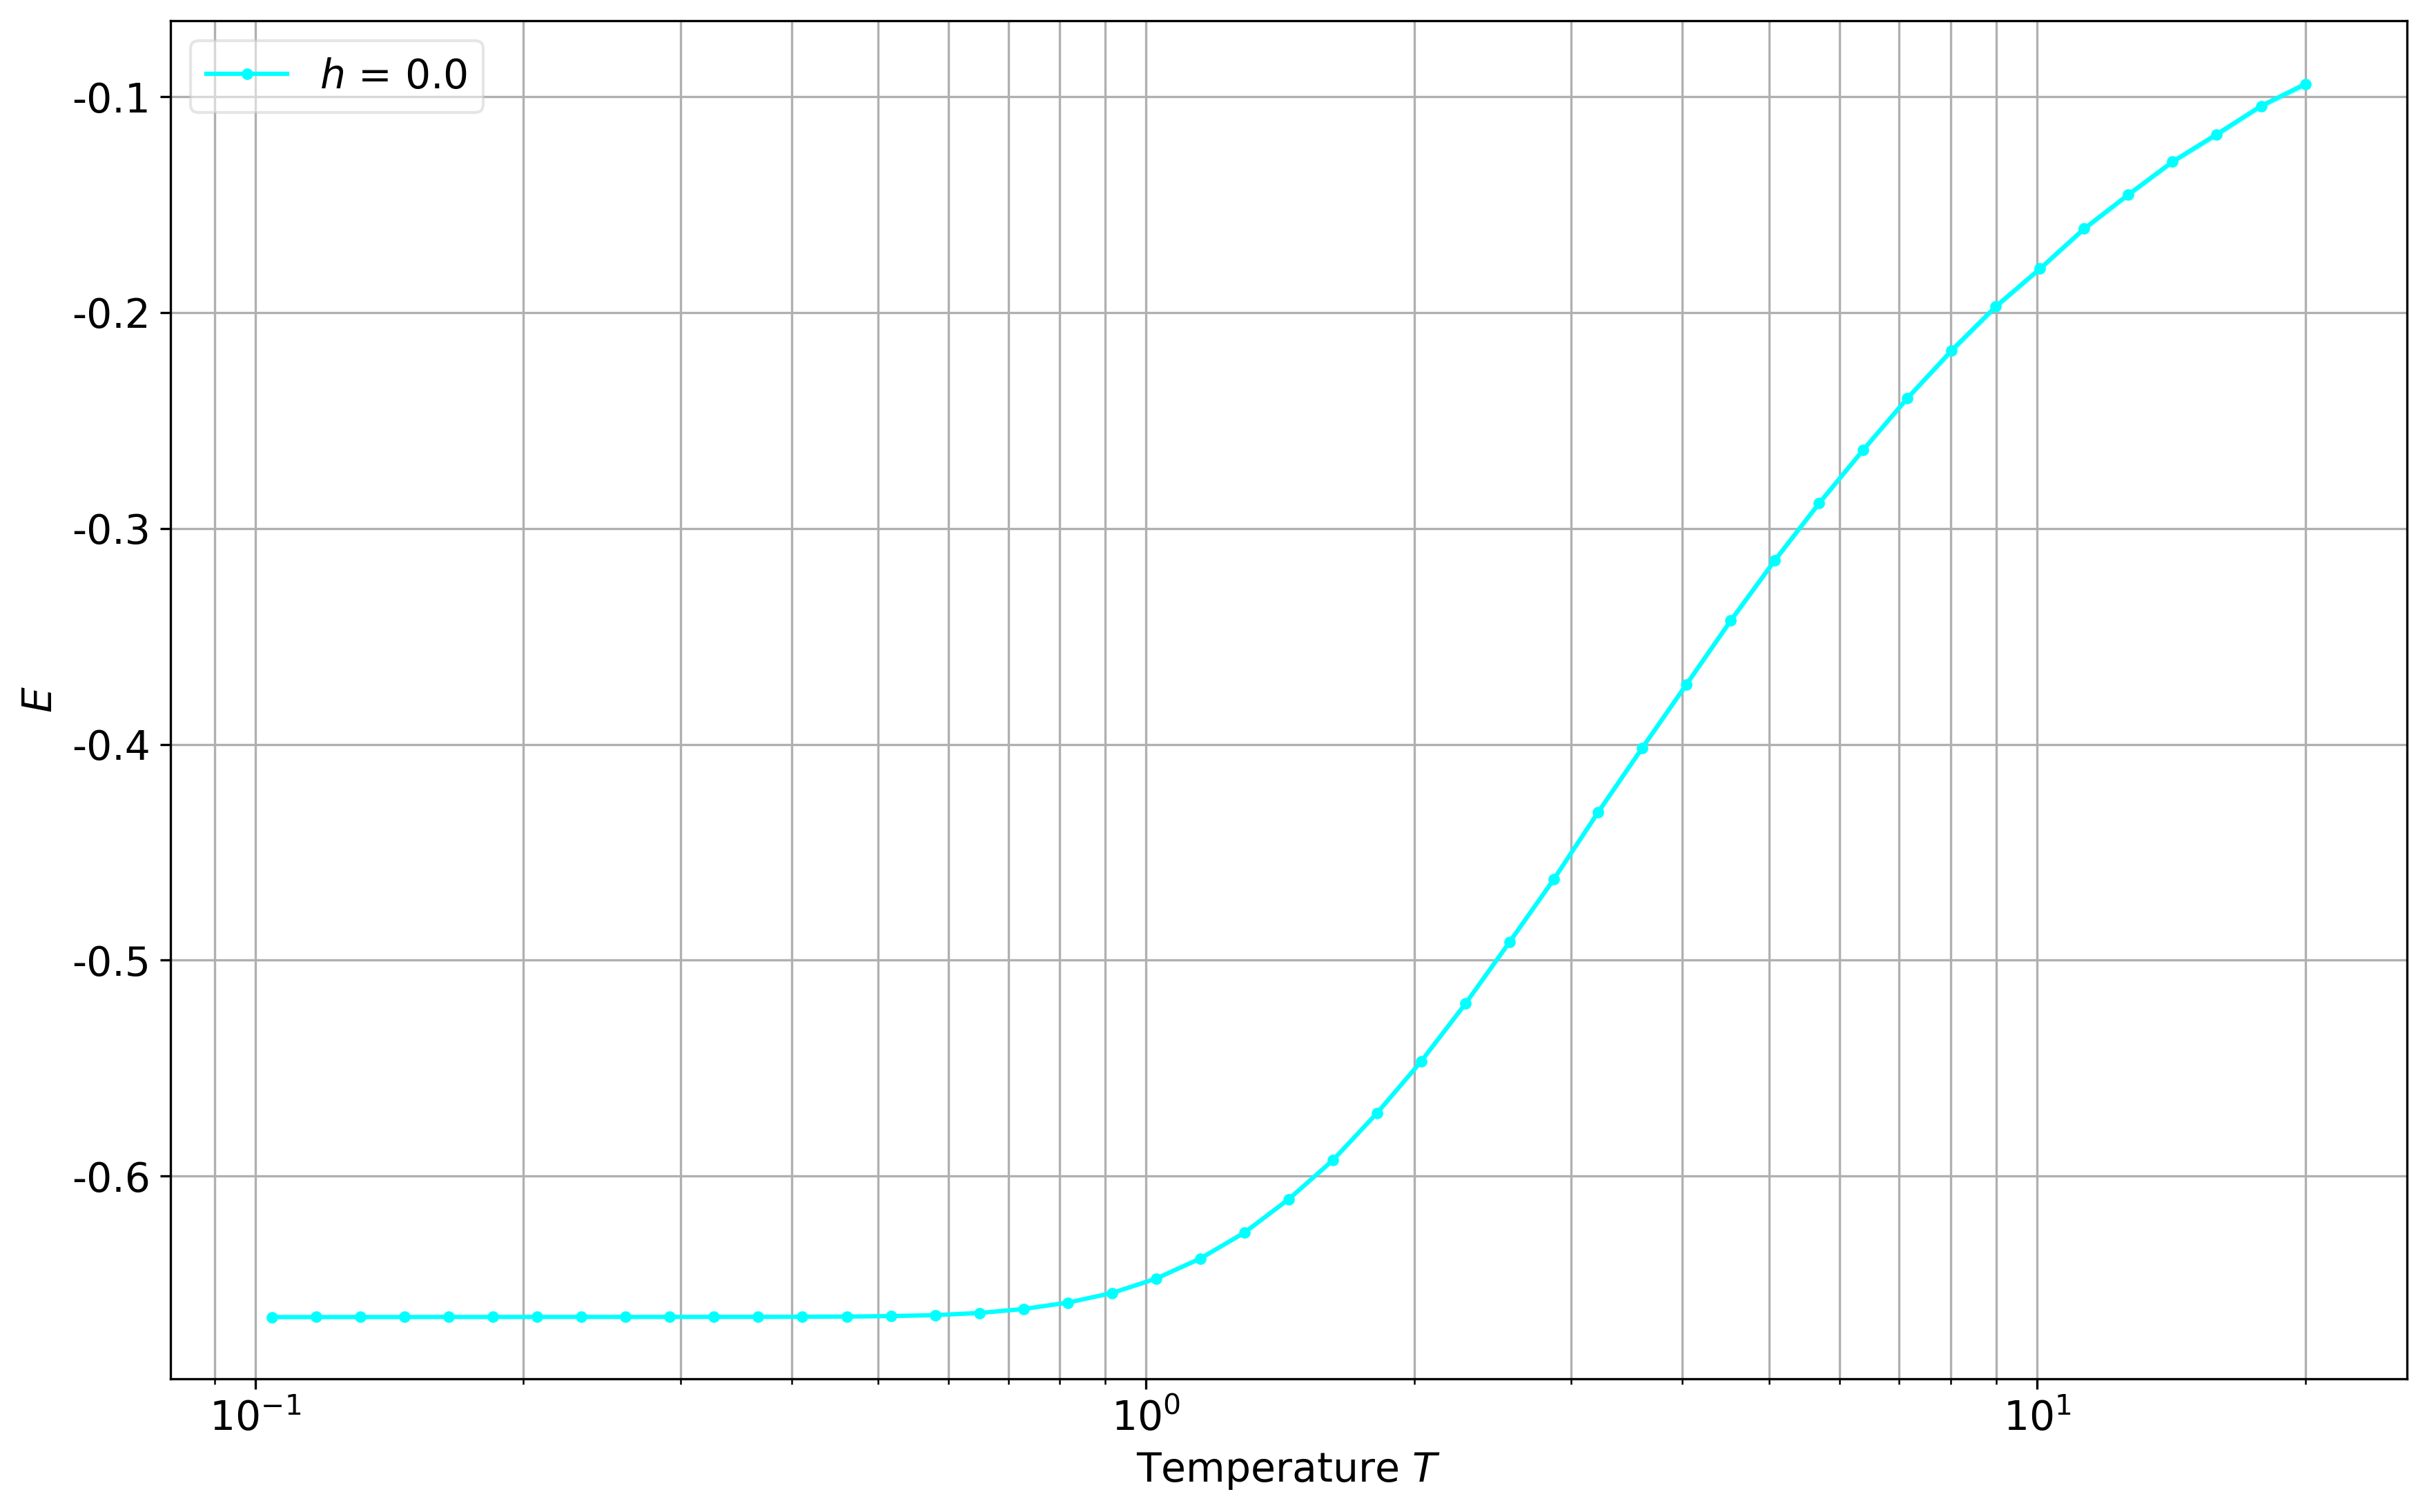

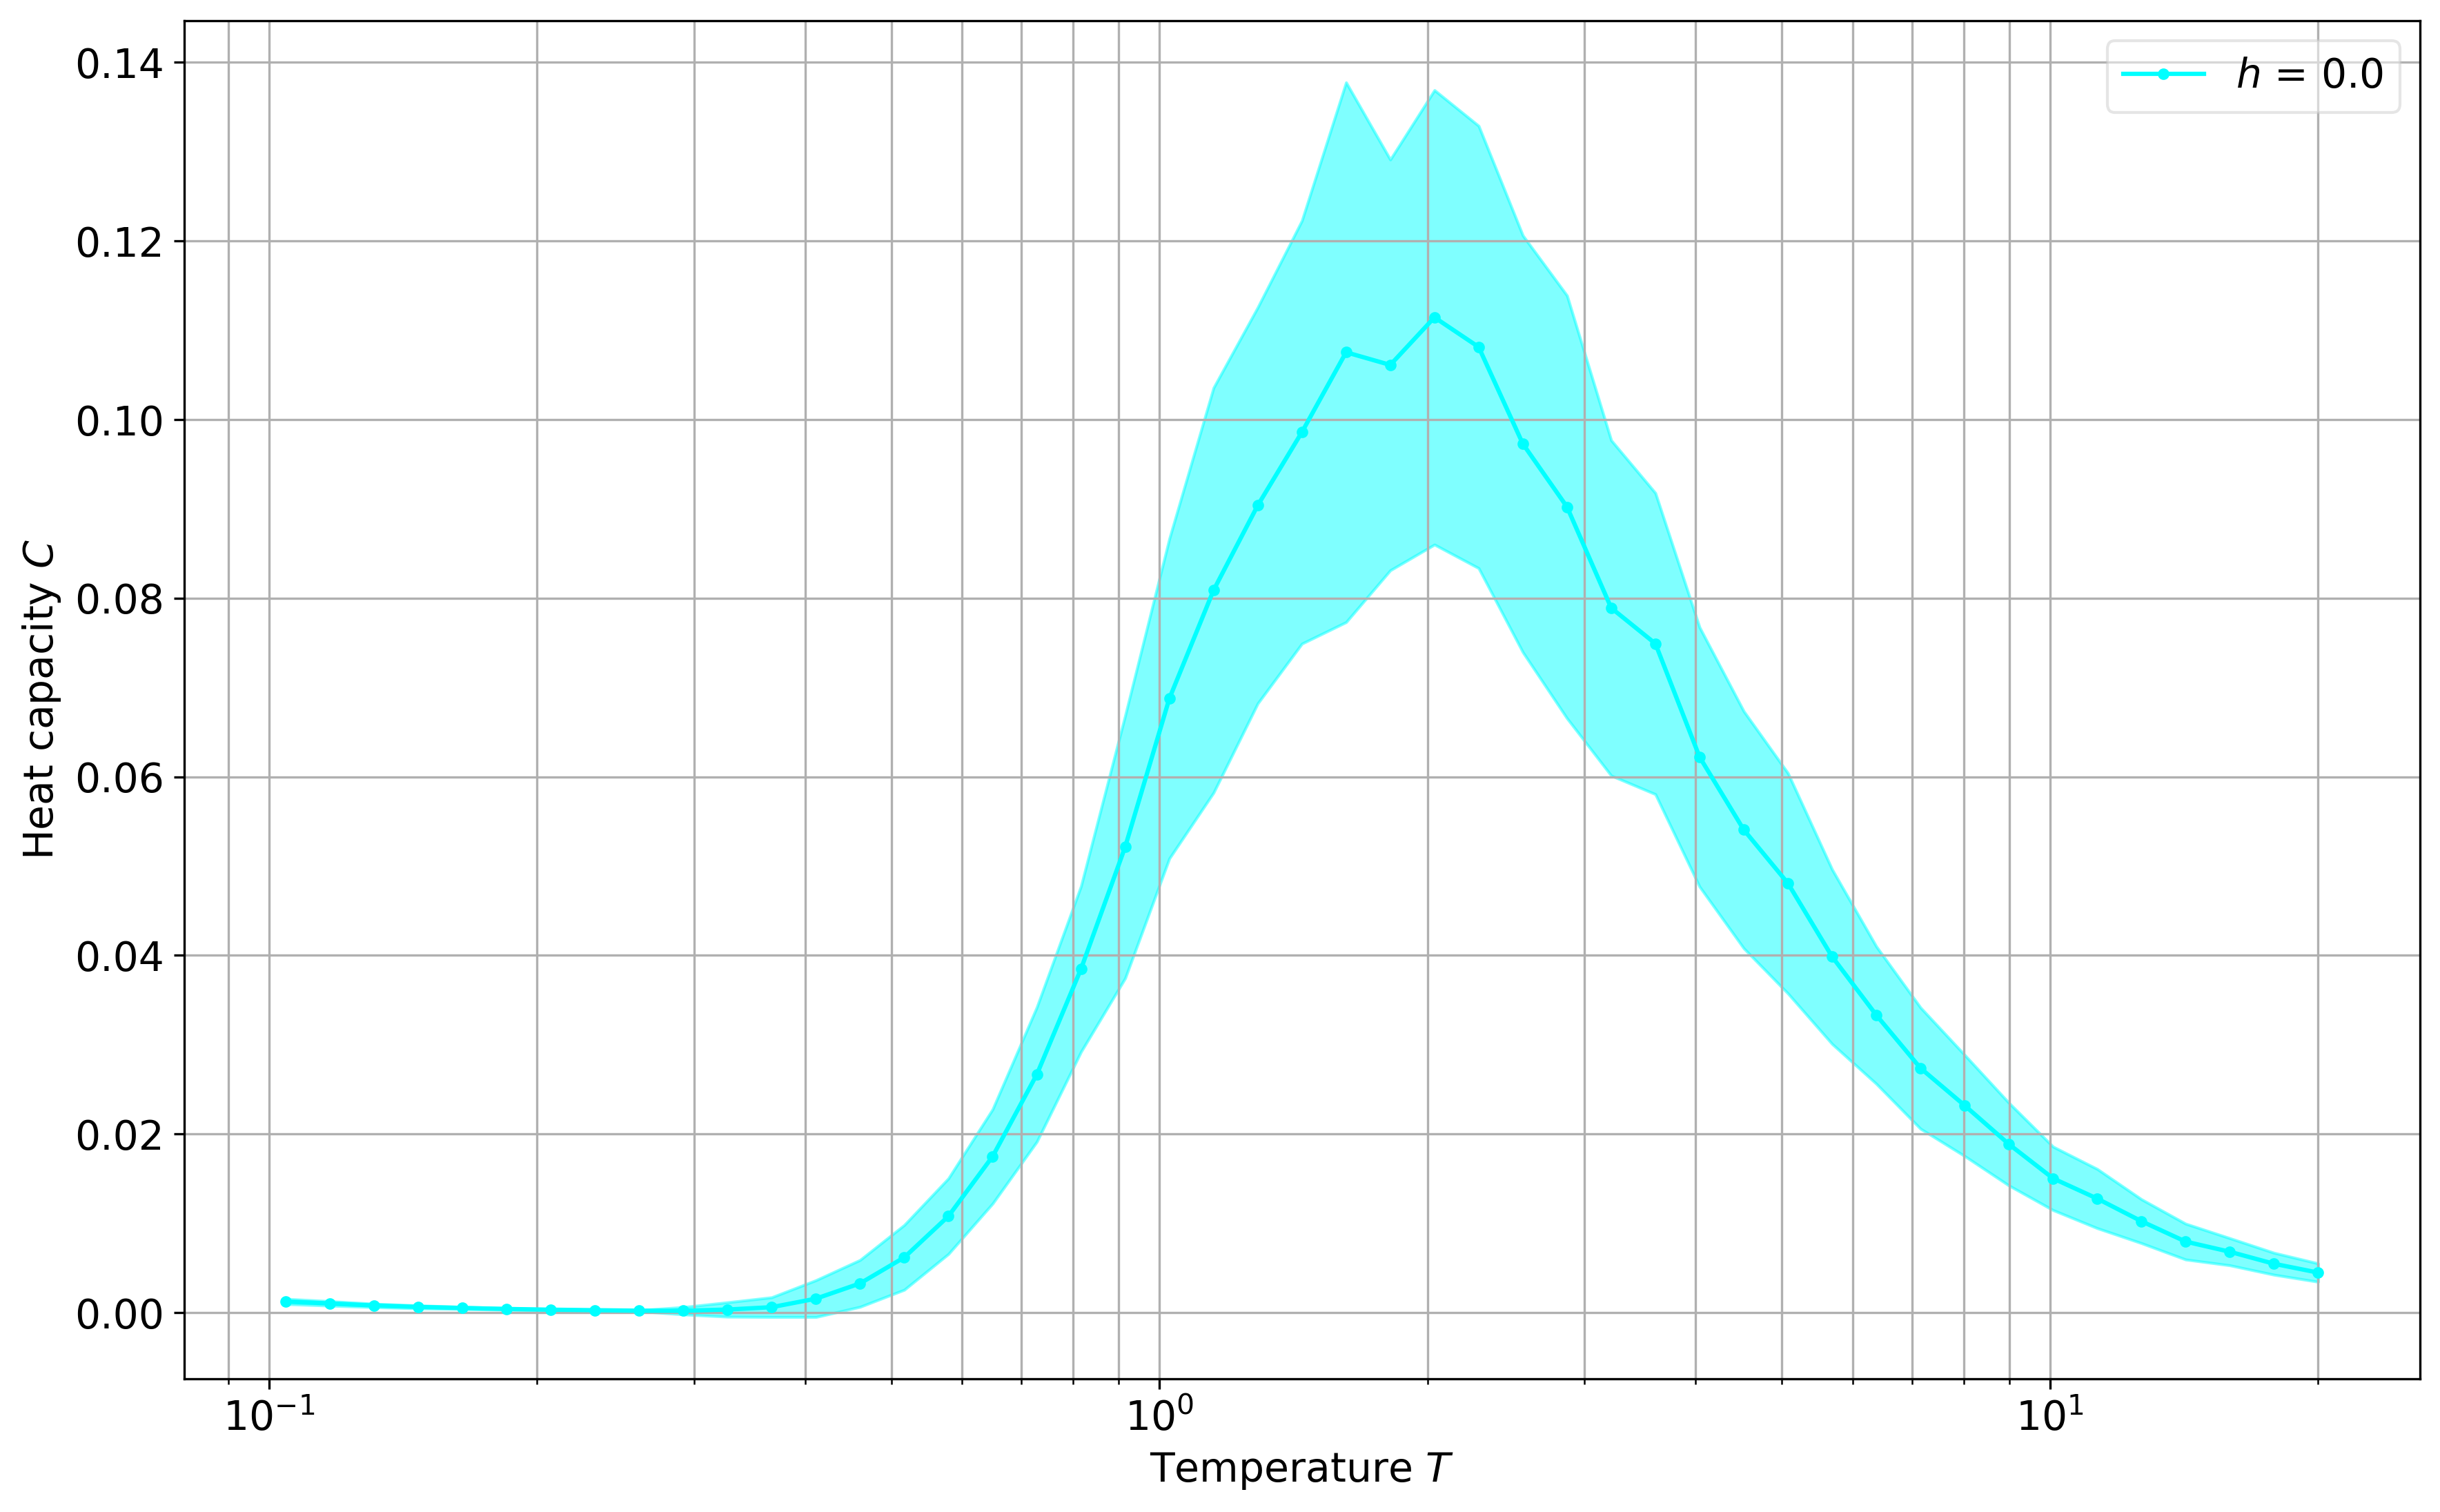

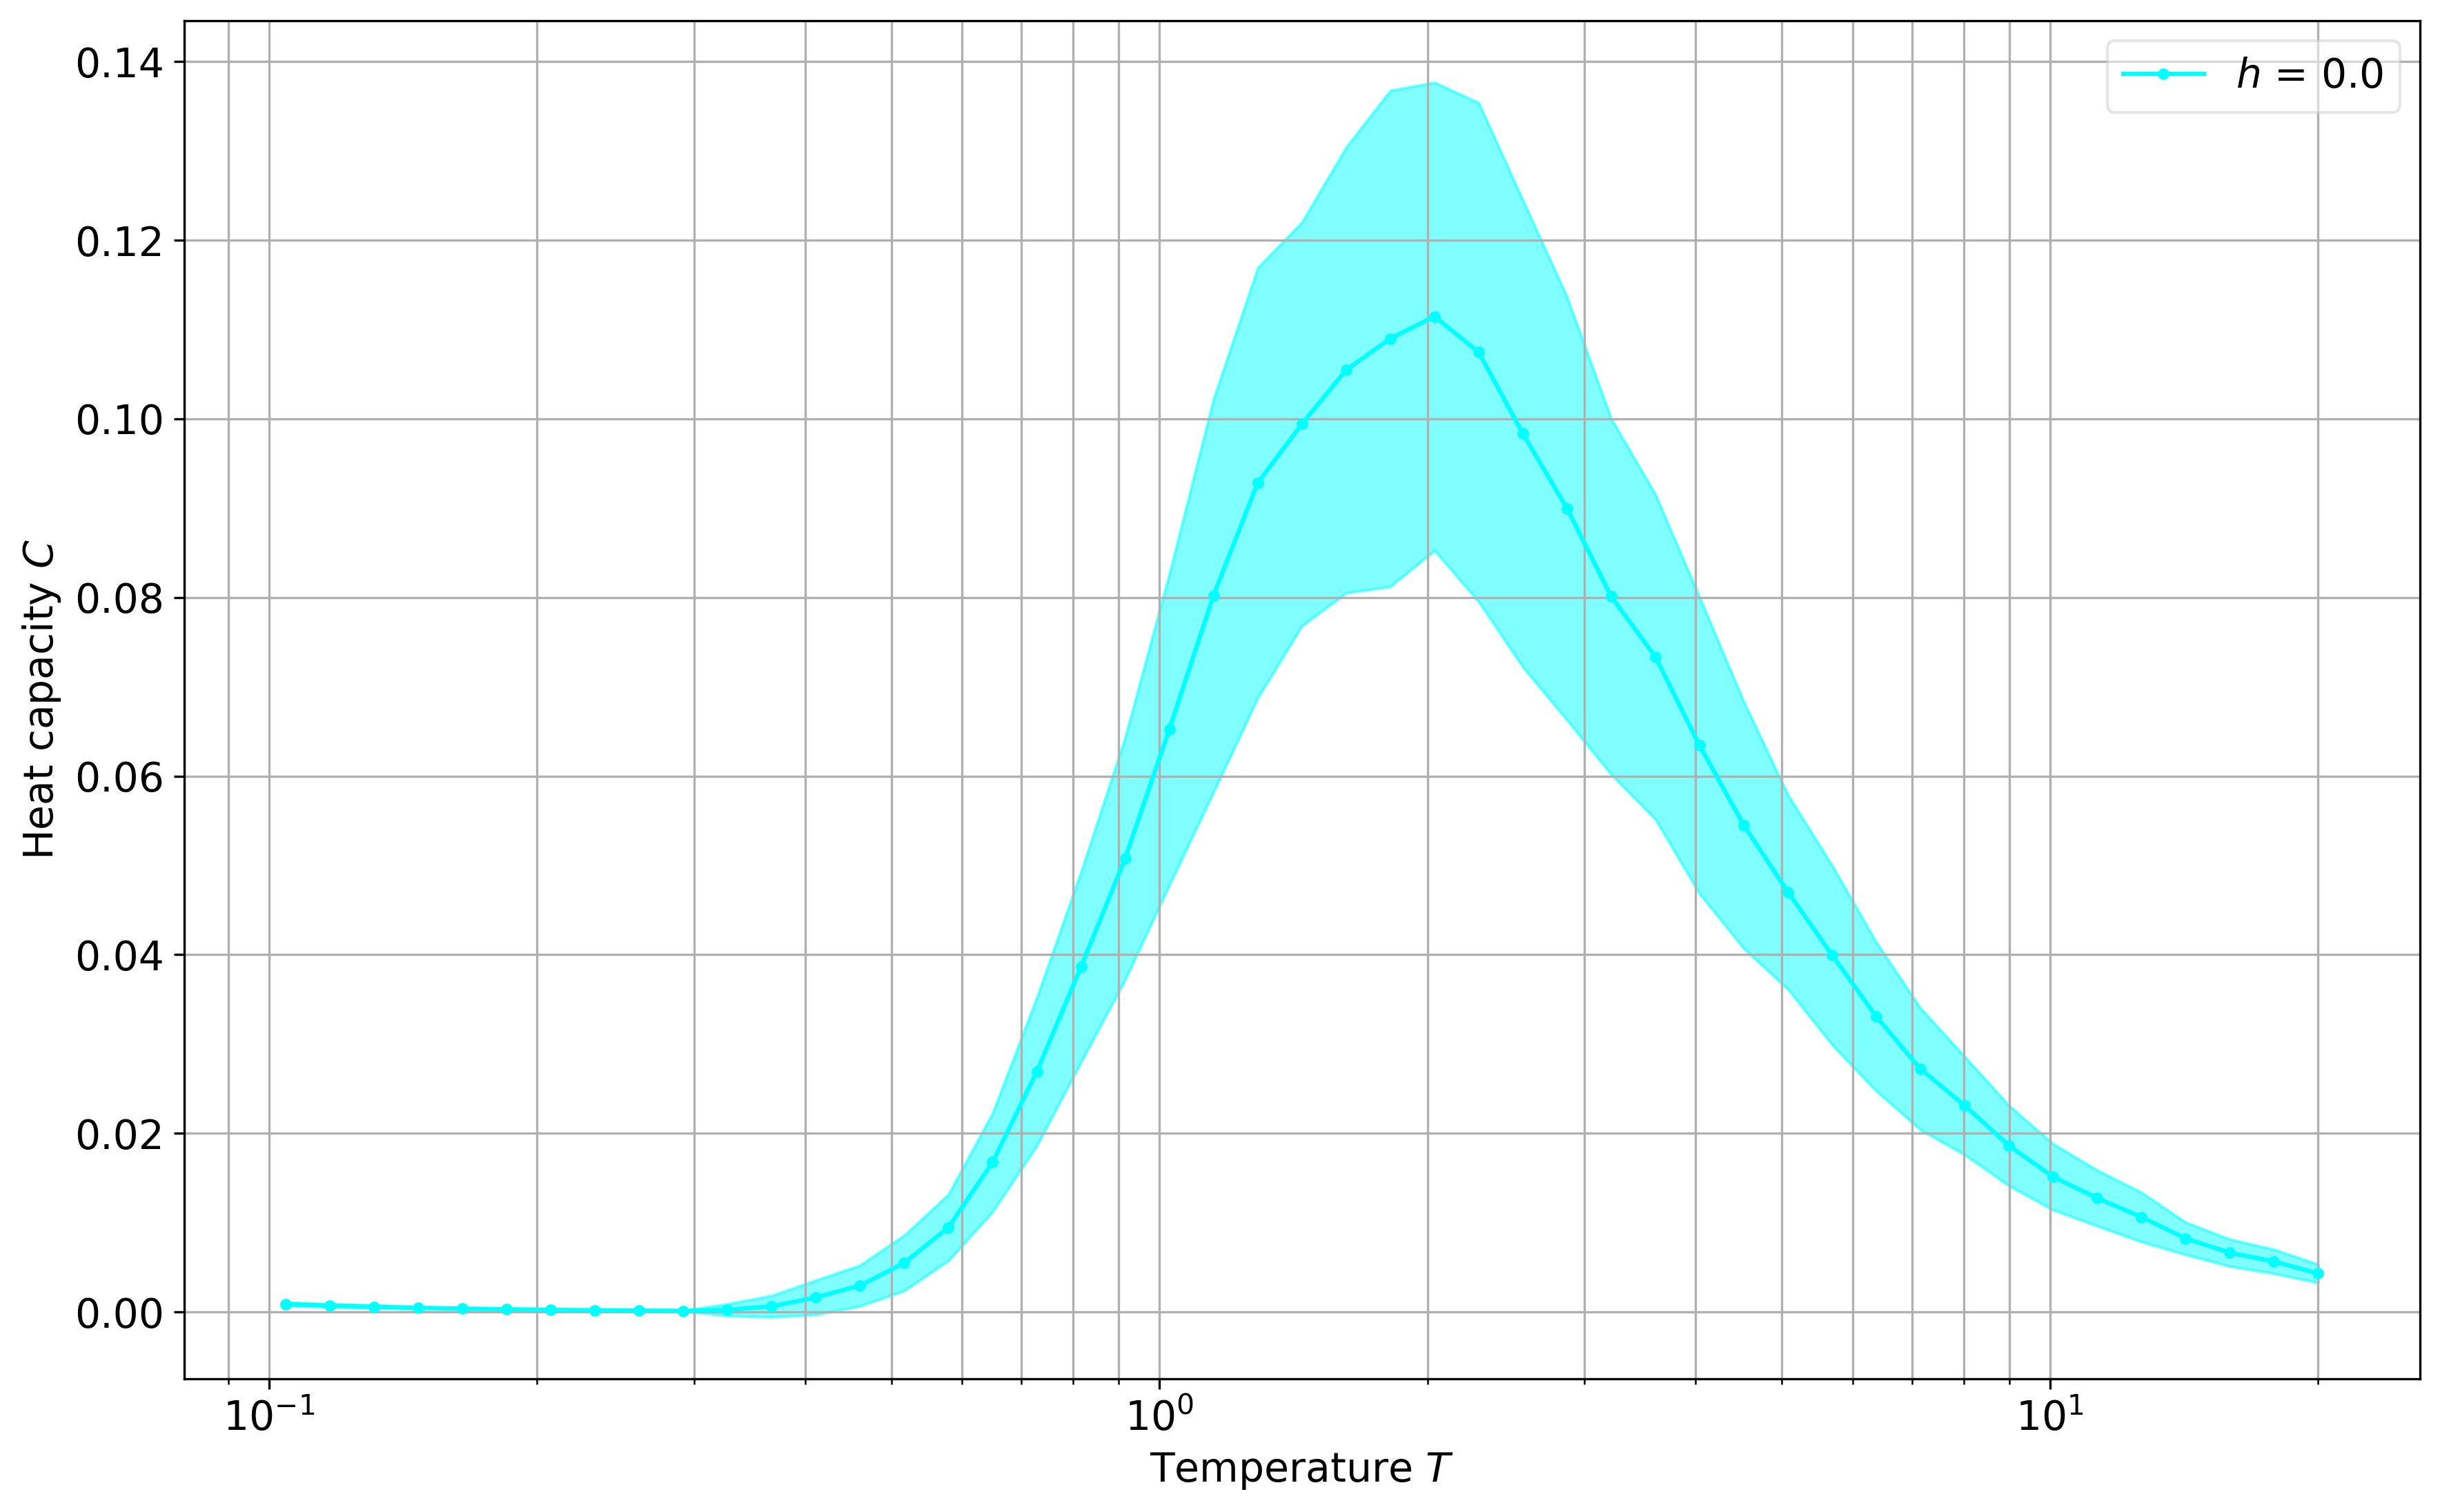

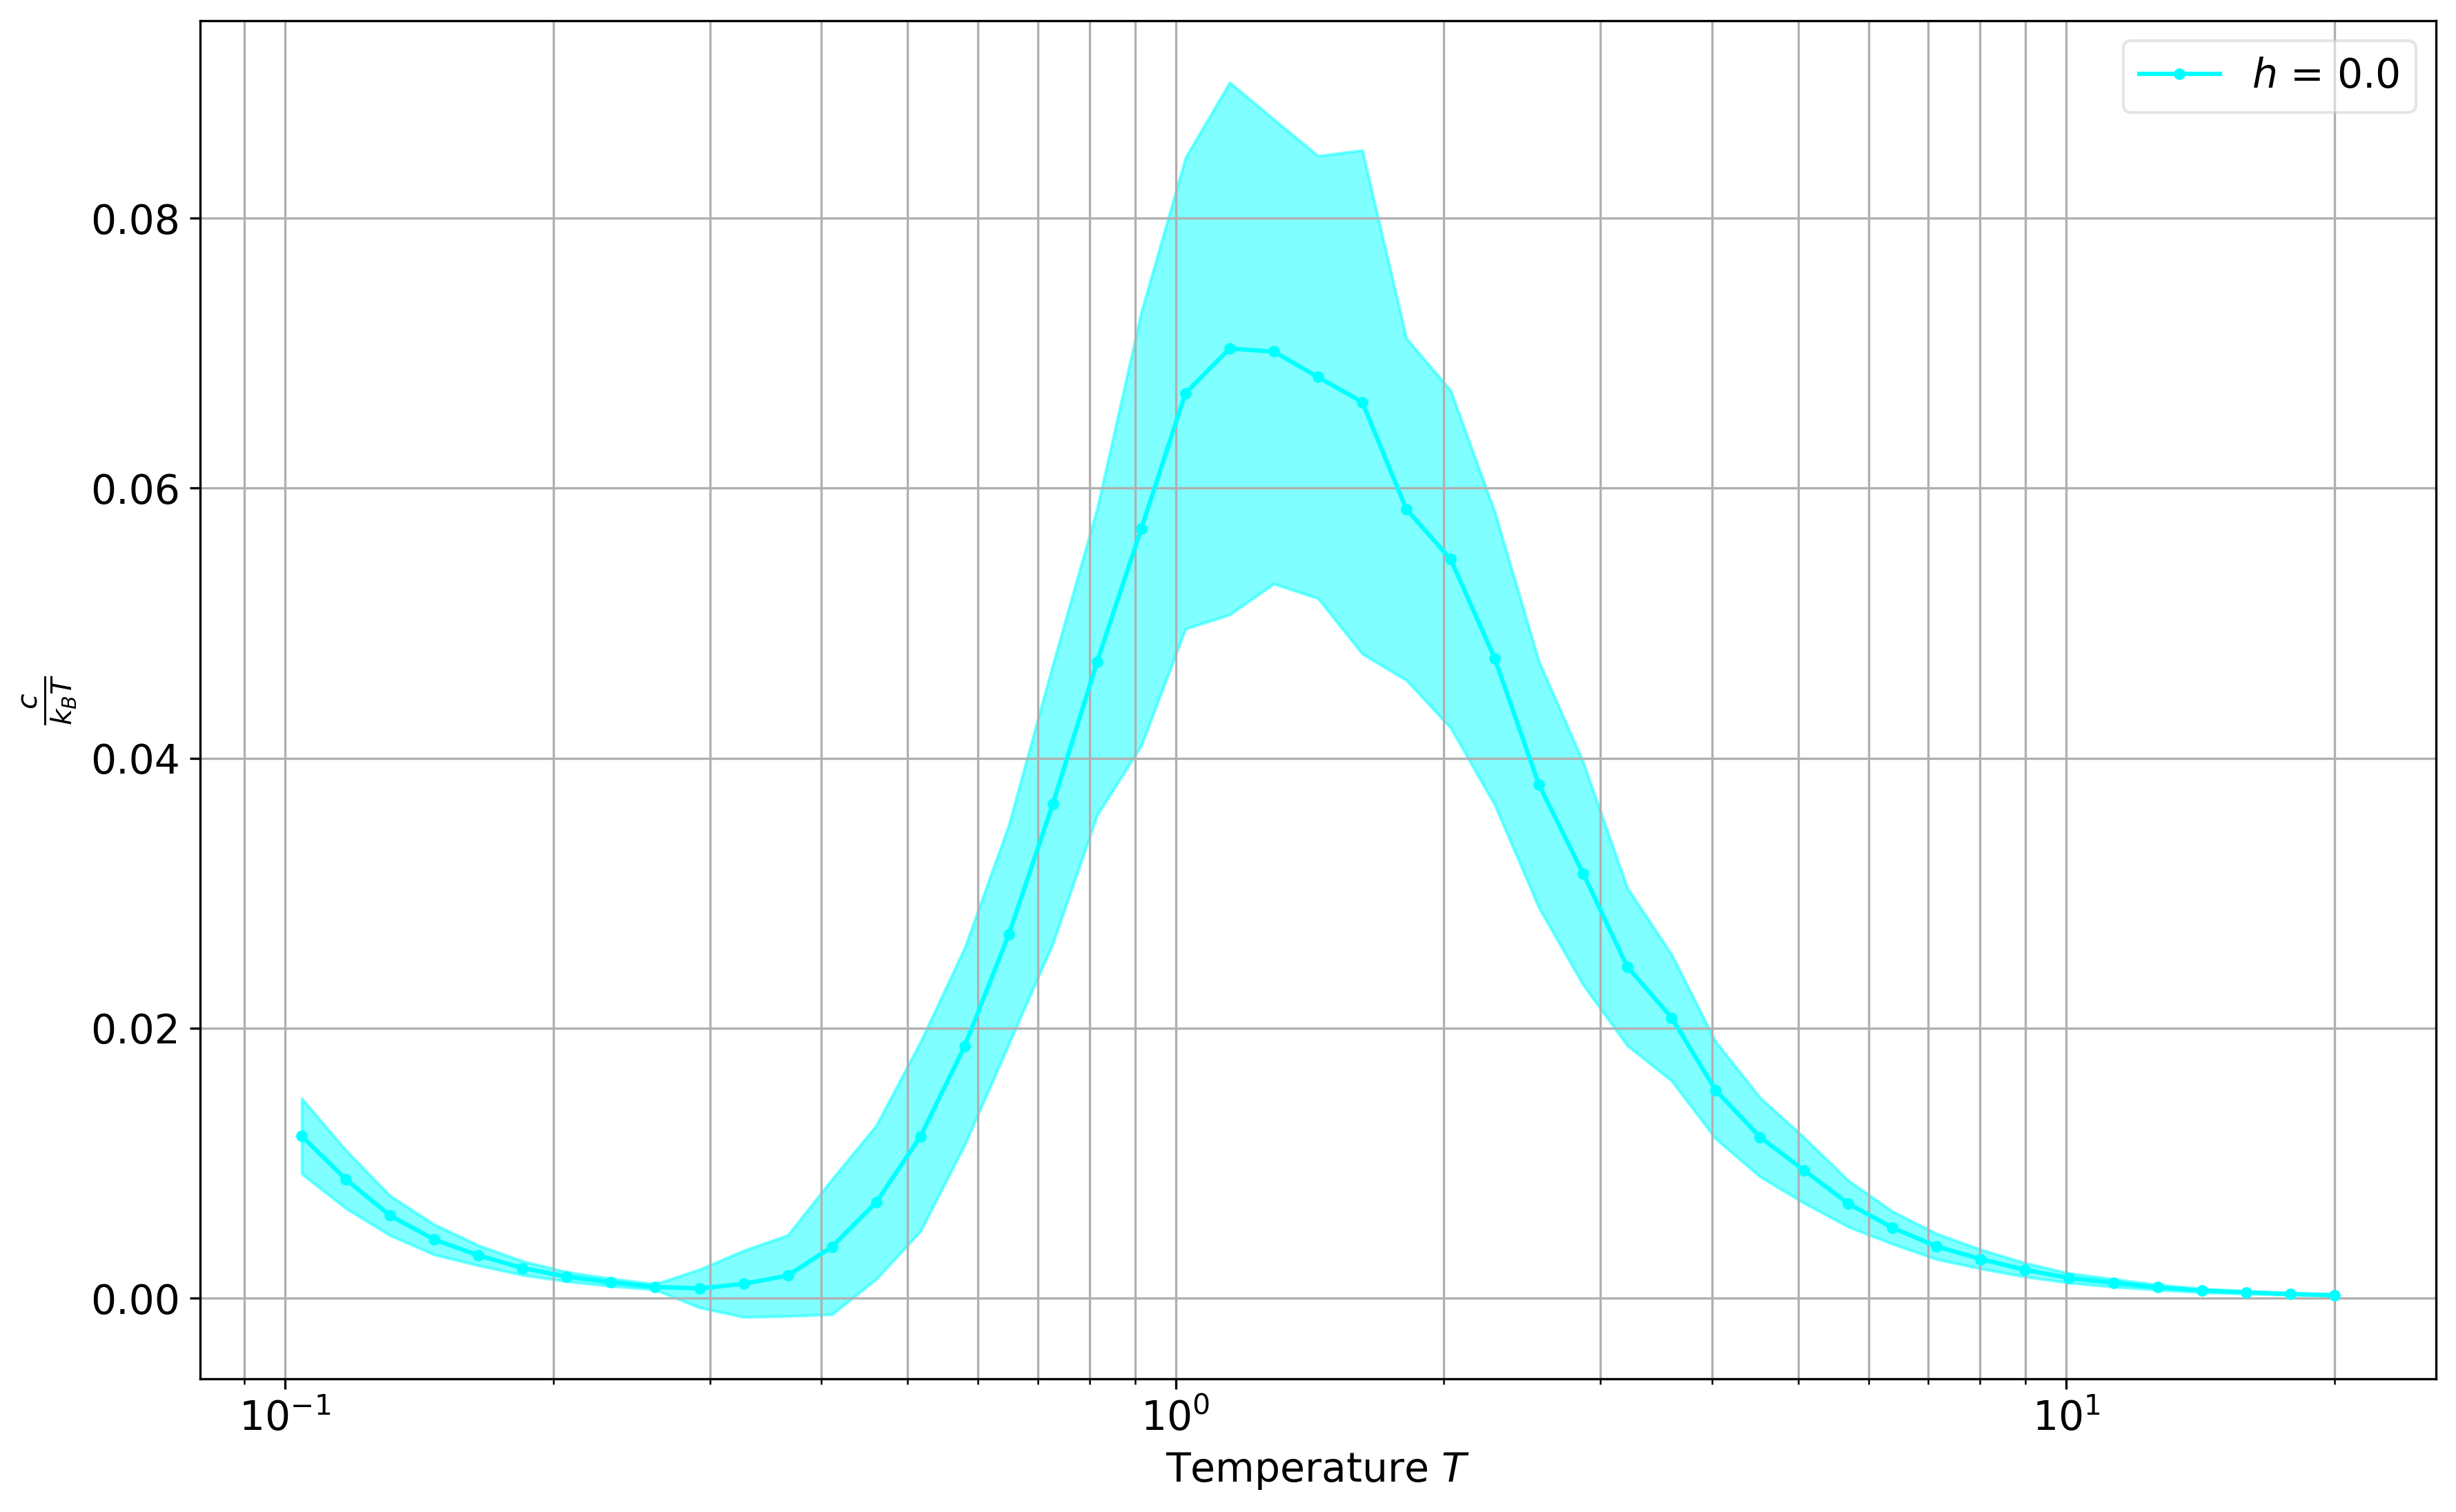

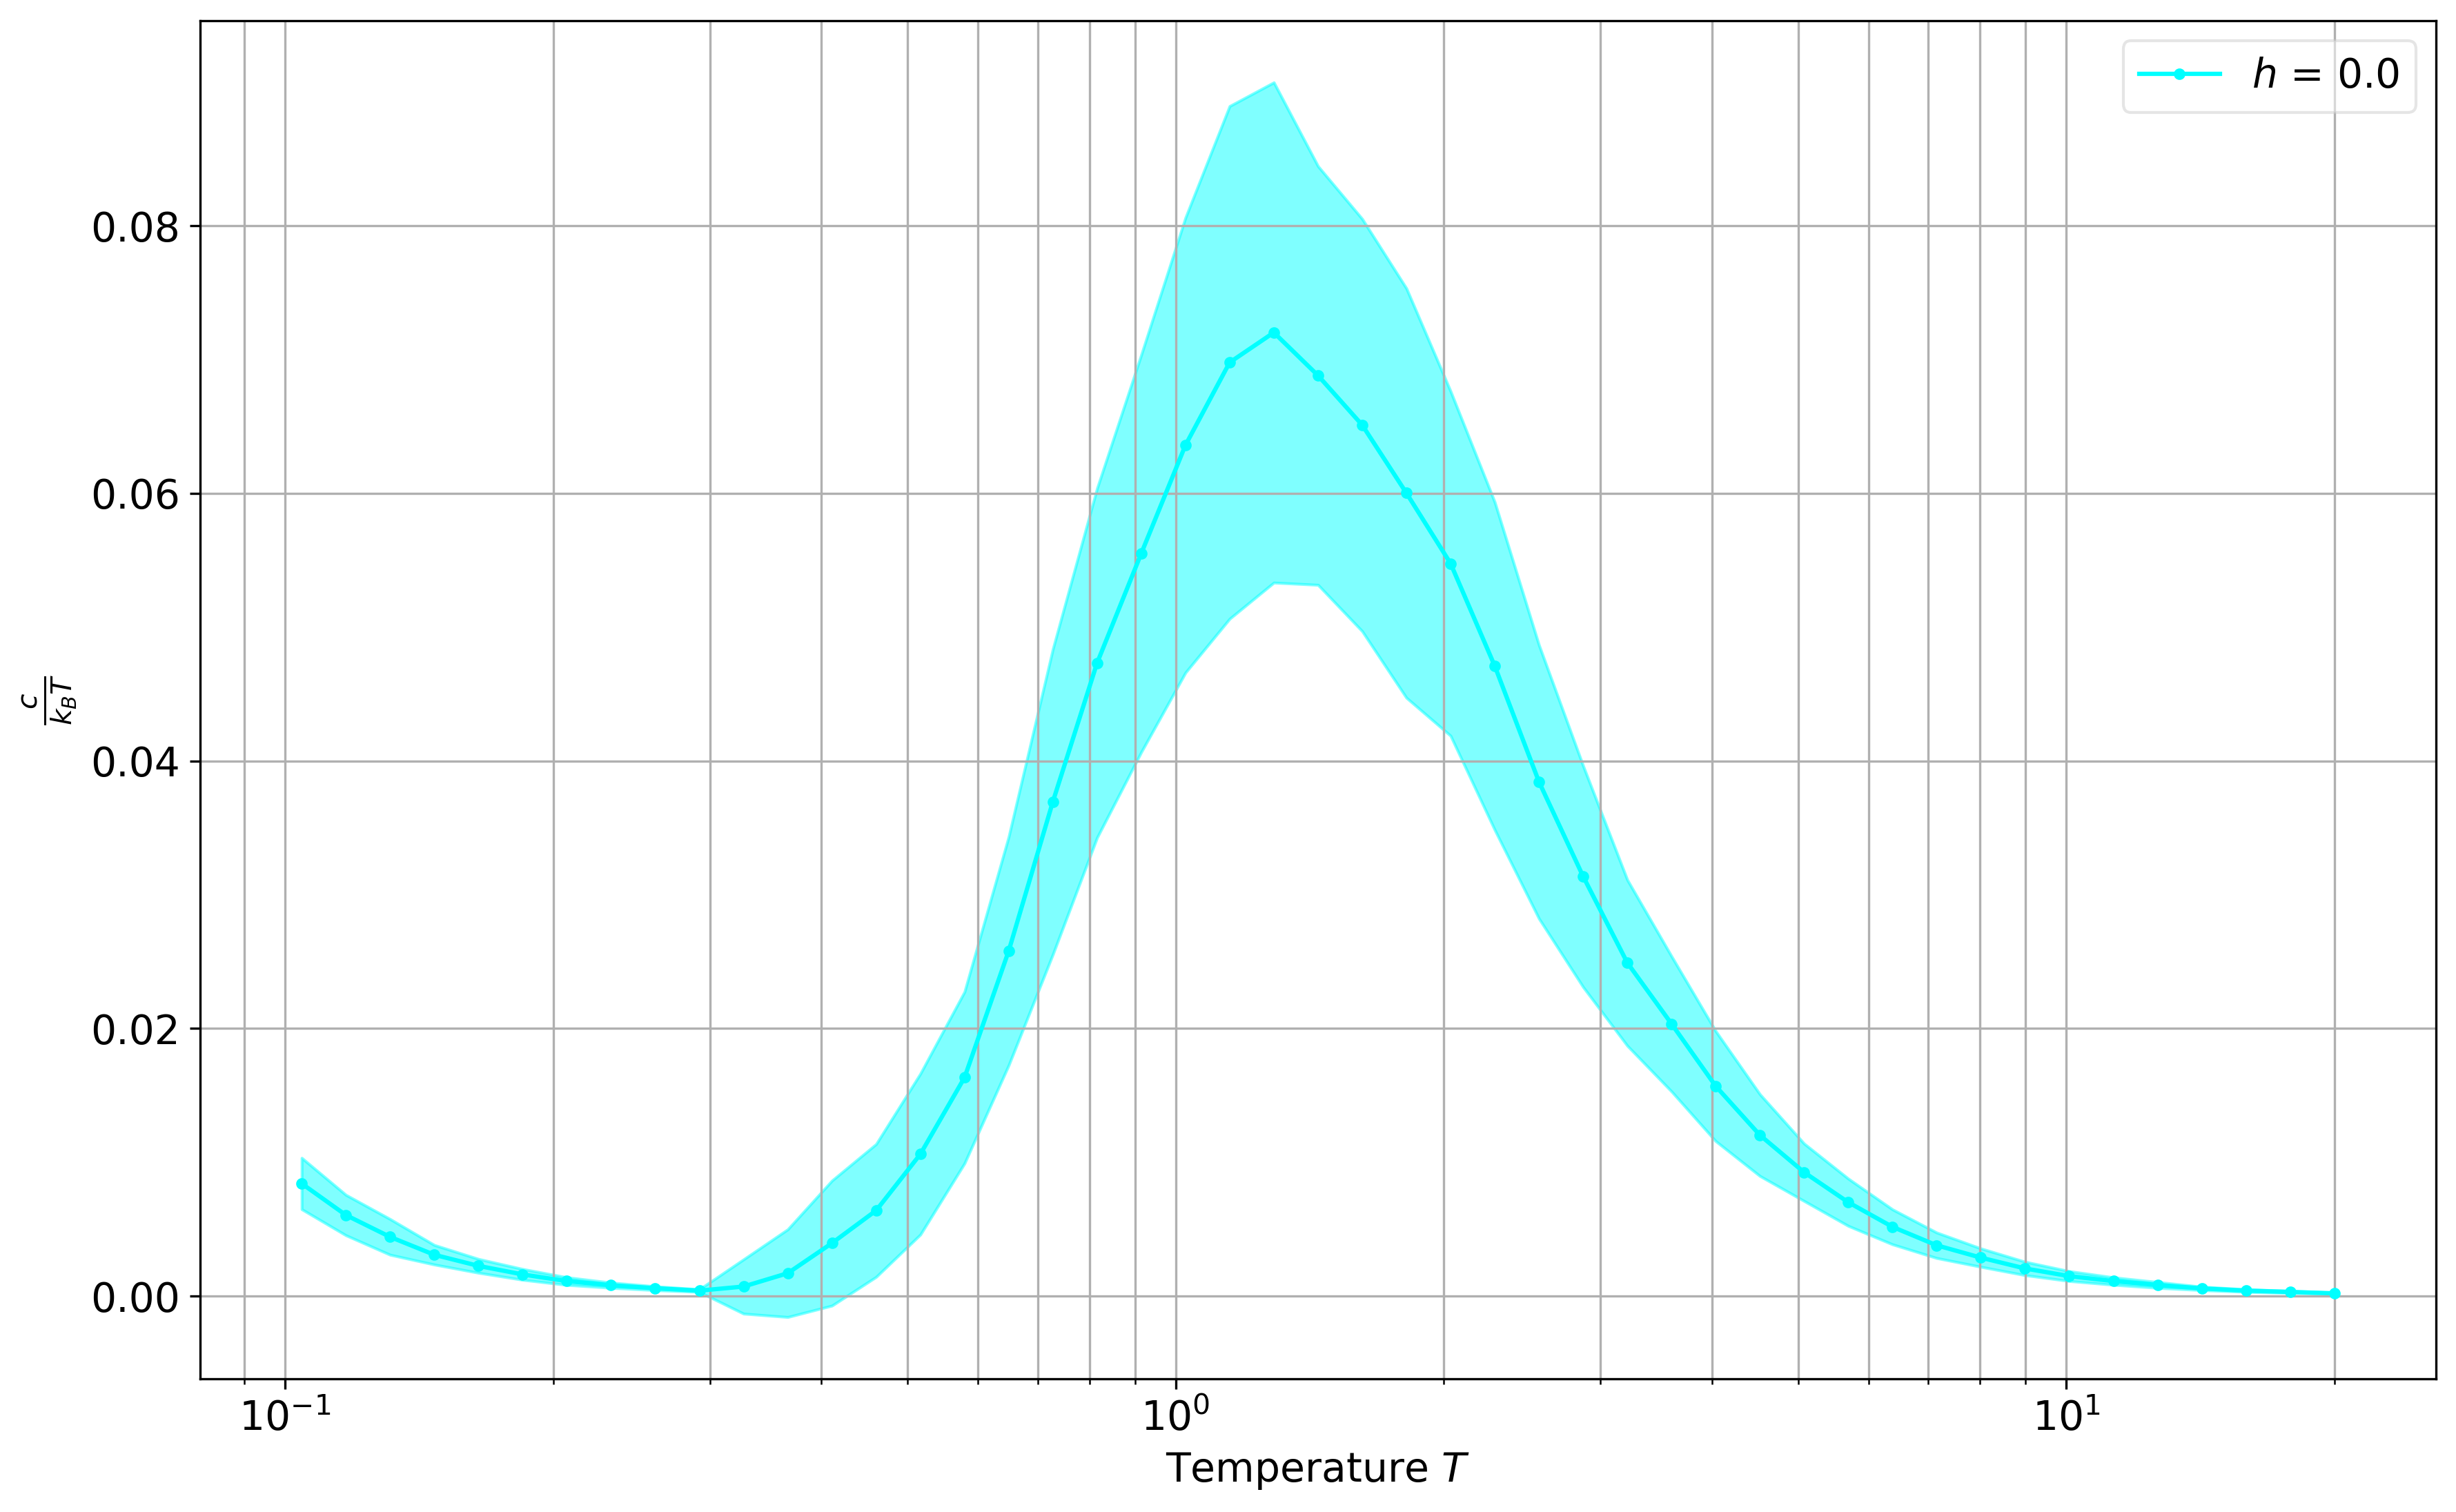

In [9]:
############################################
#        ## Energy ANALYSIS ##
############################################
### Energy
S0 = np.log(2)
kw = {'gscheck': True}
af.BasicPlotsE(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
plt.show()

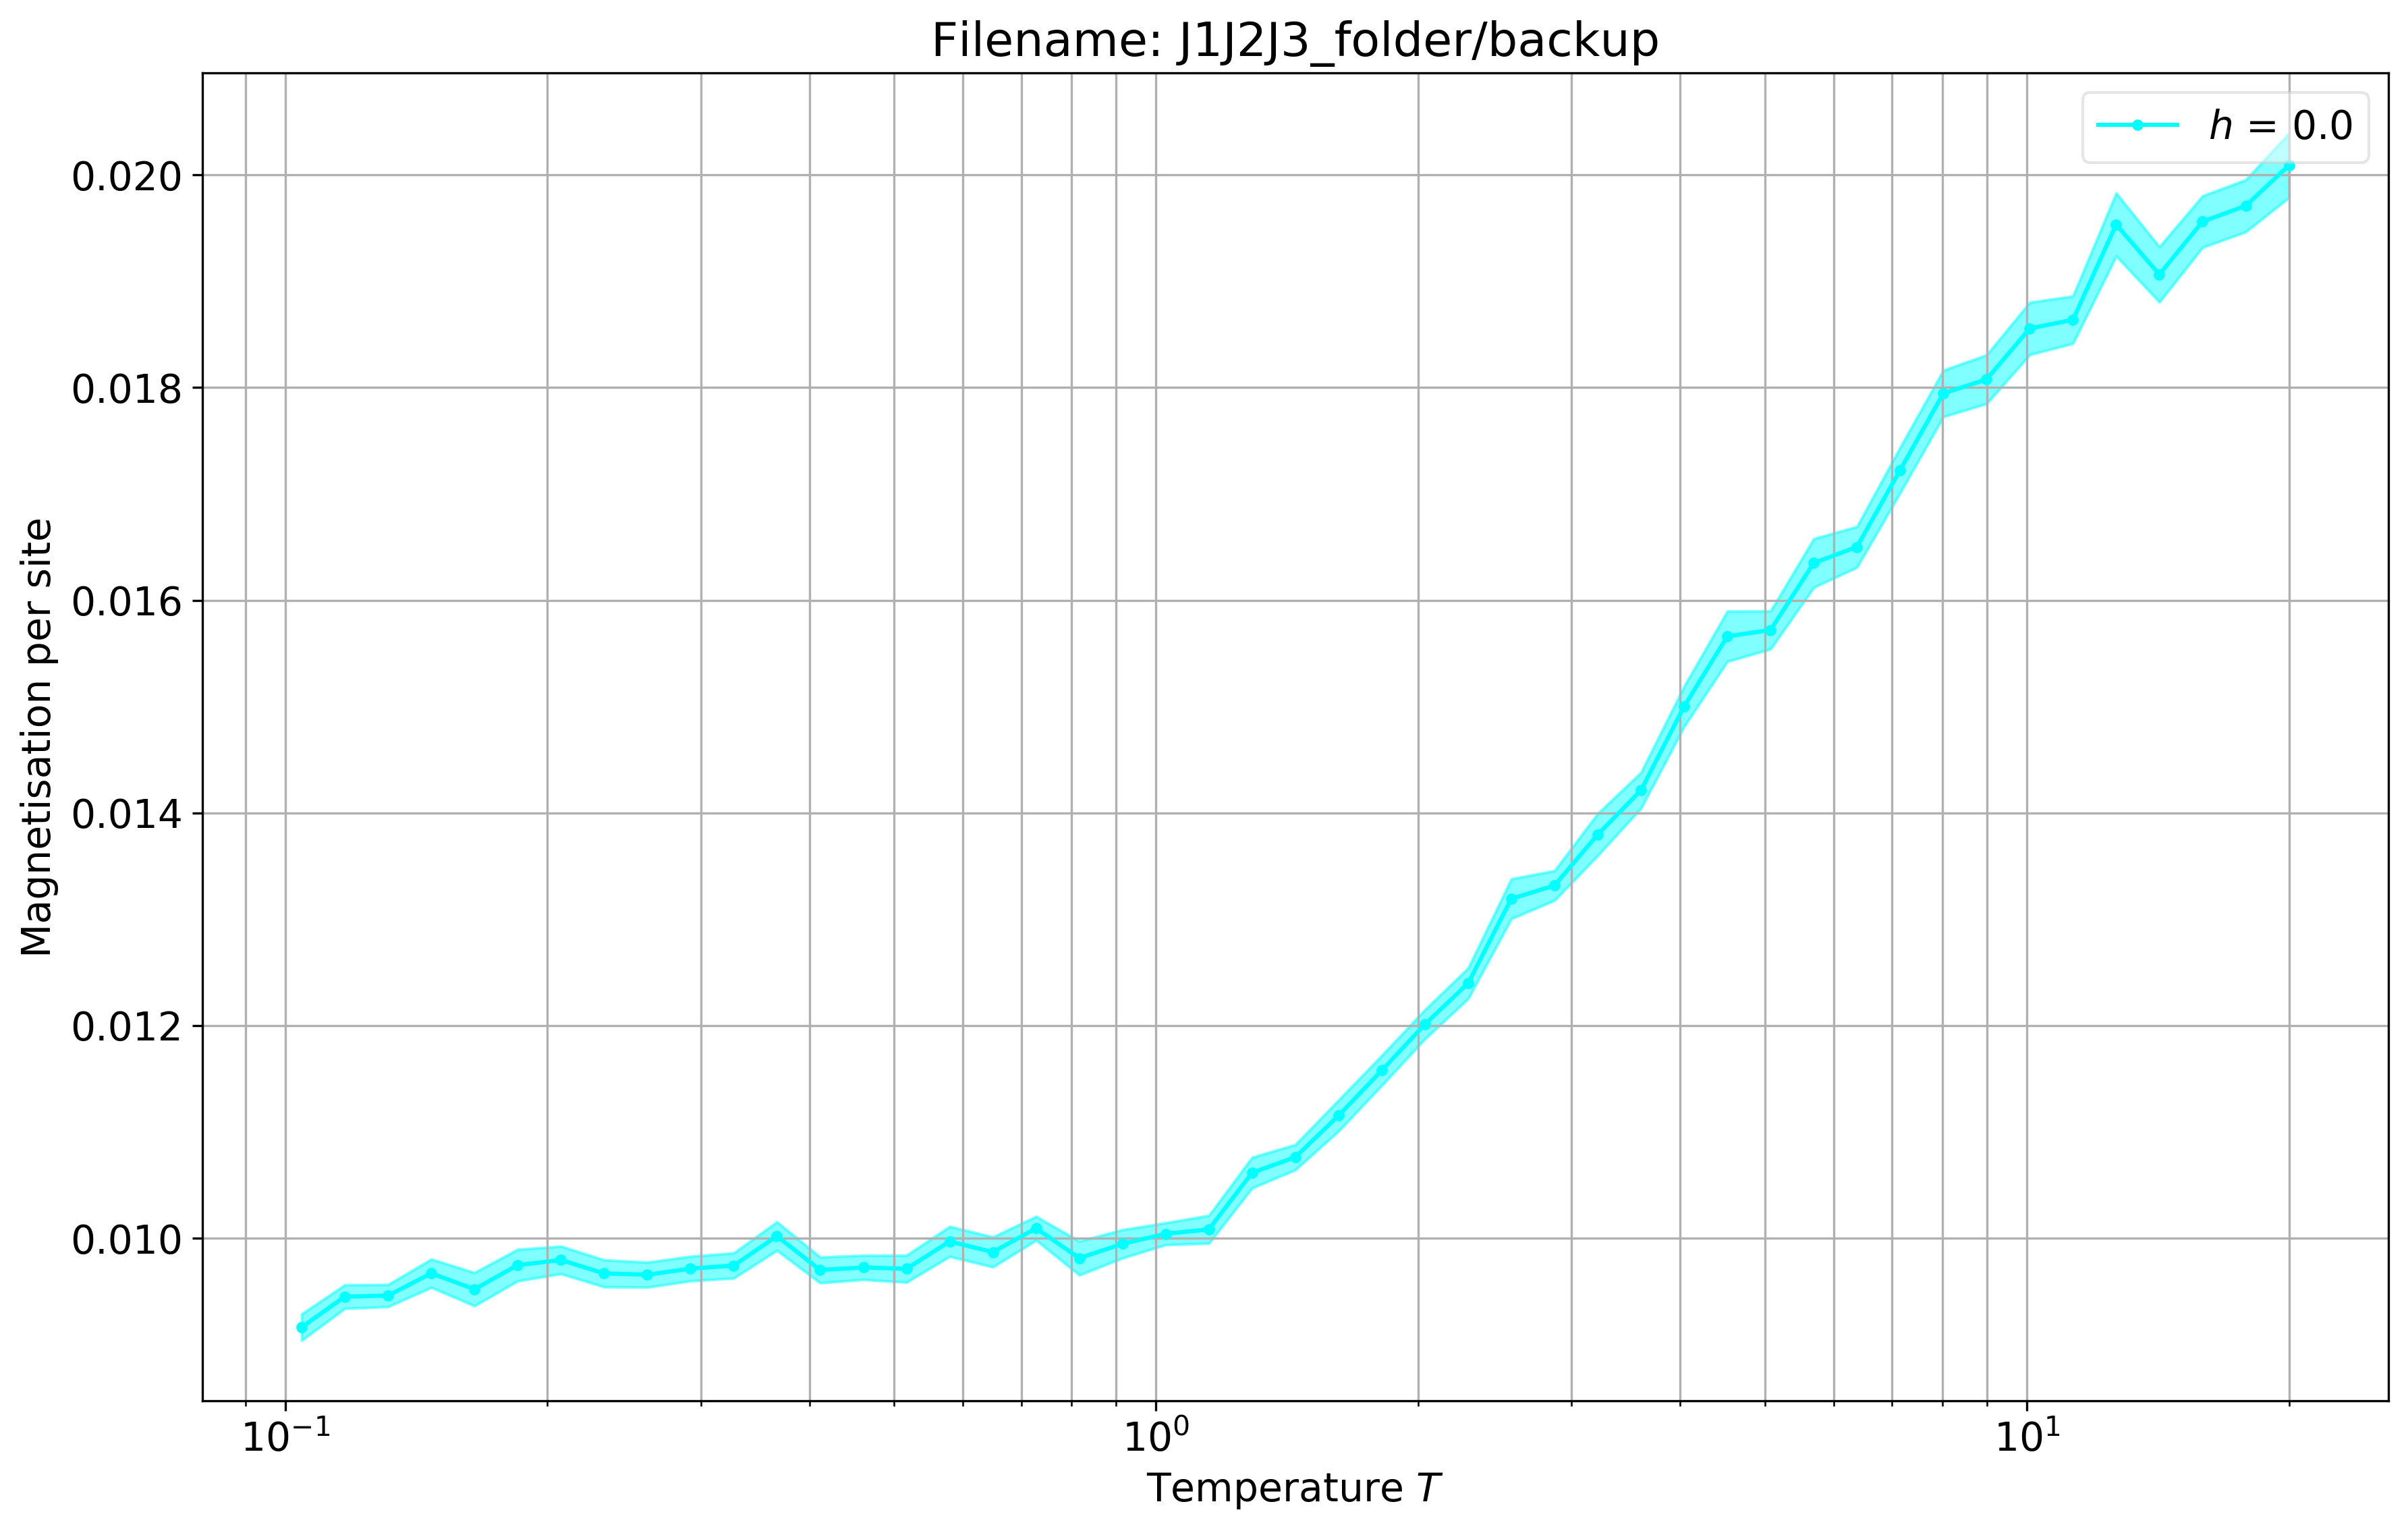

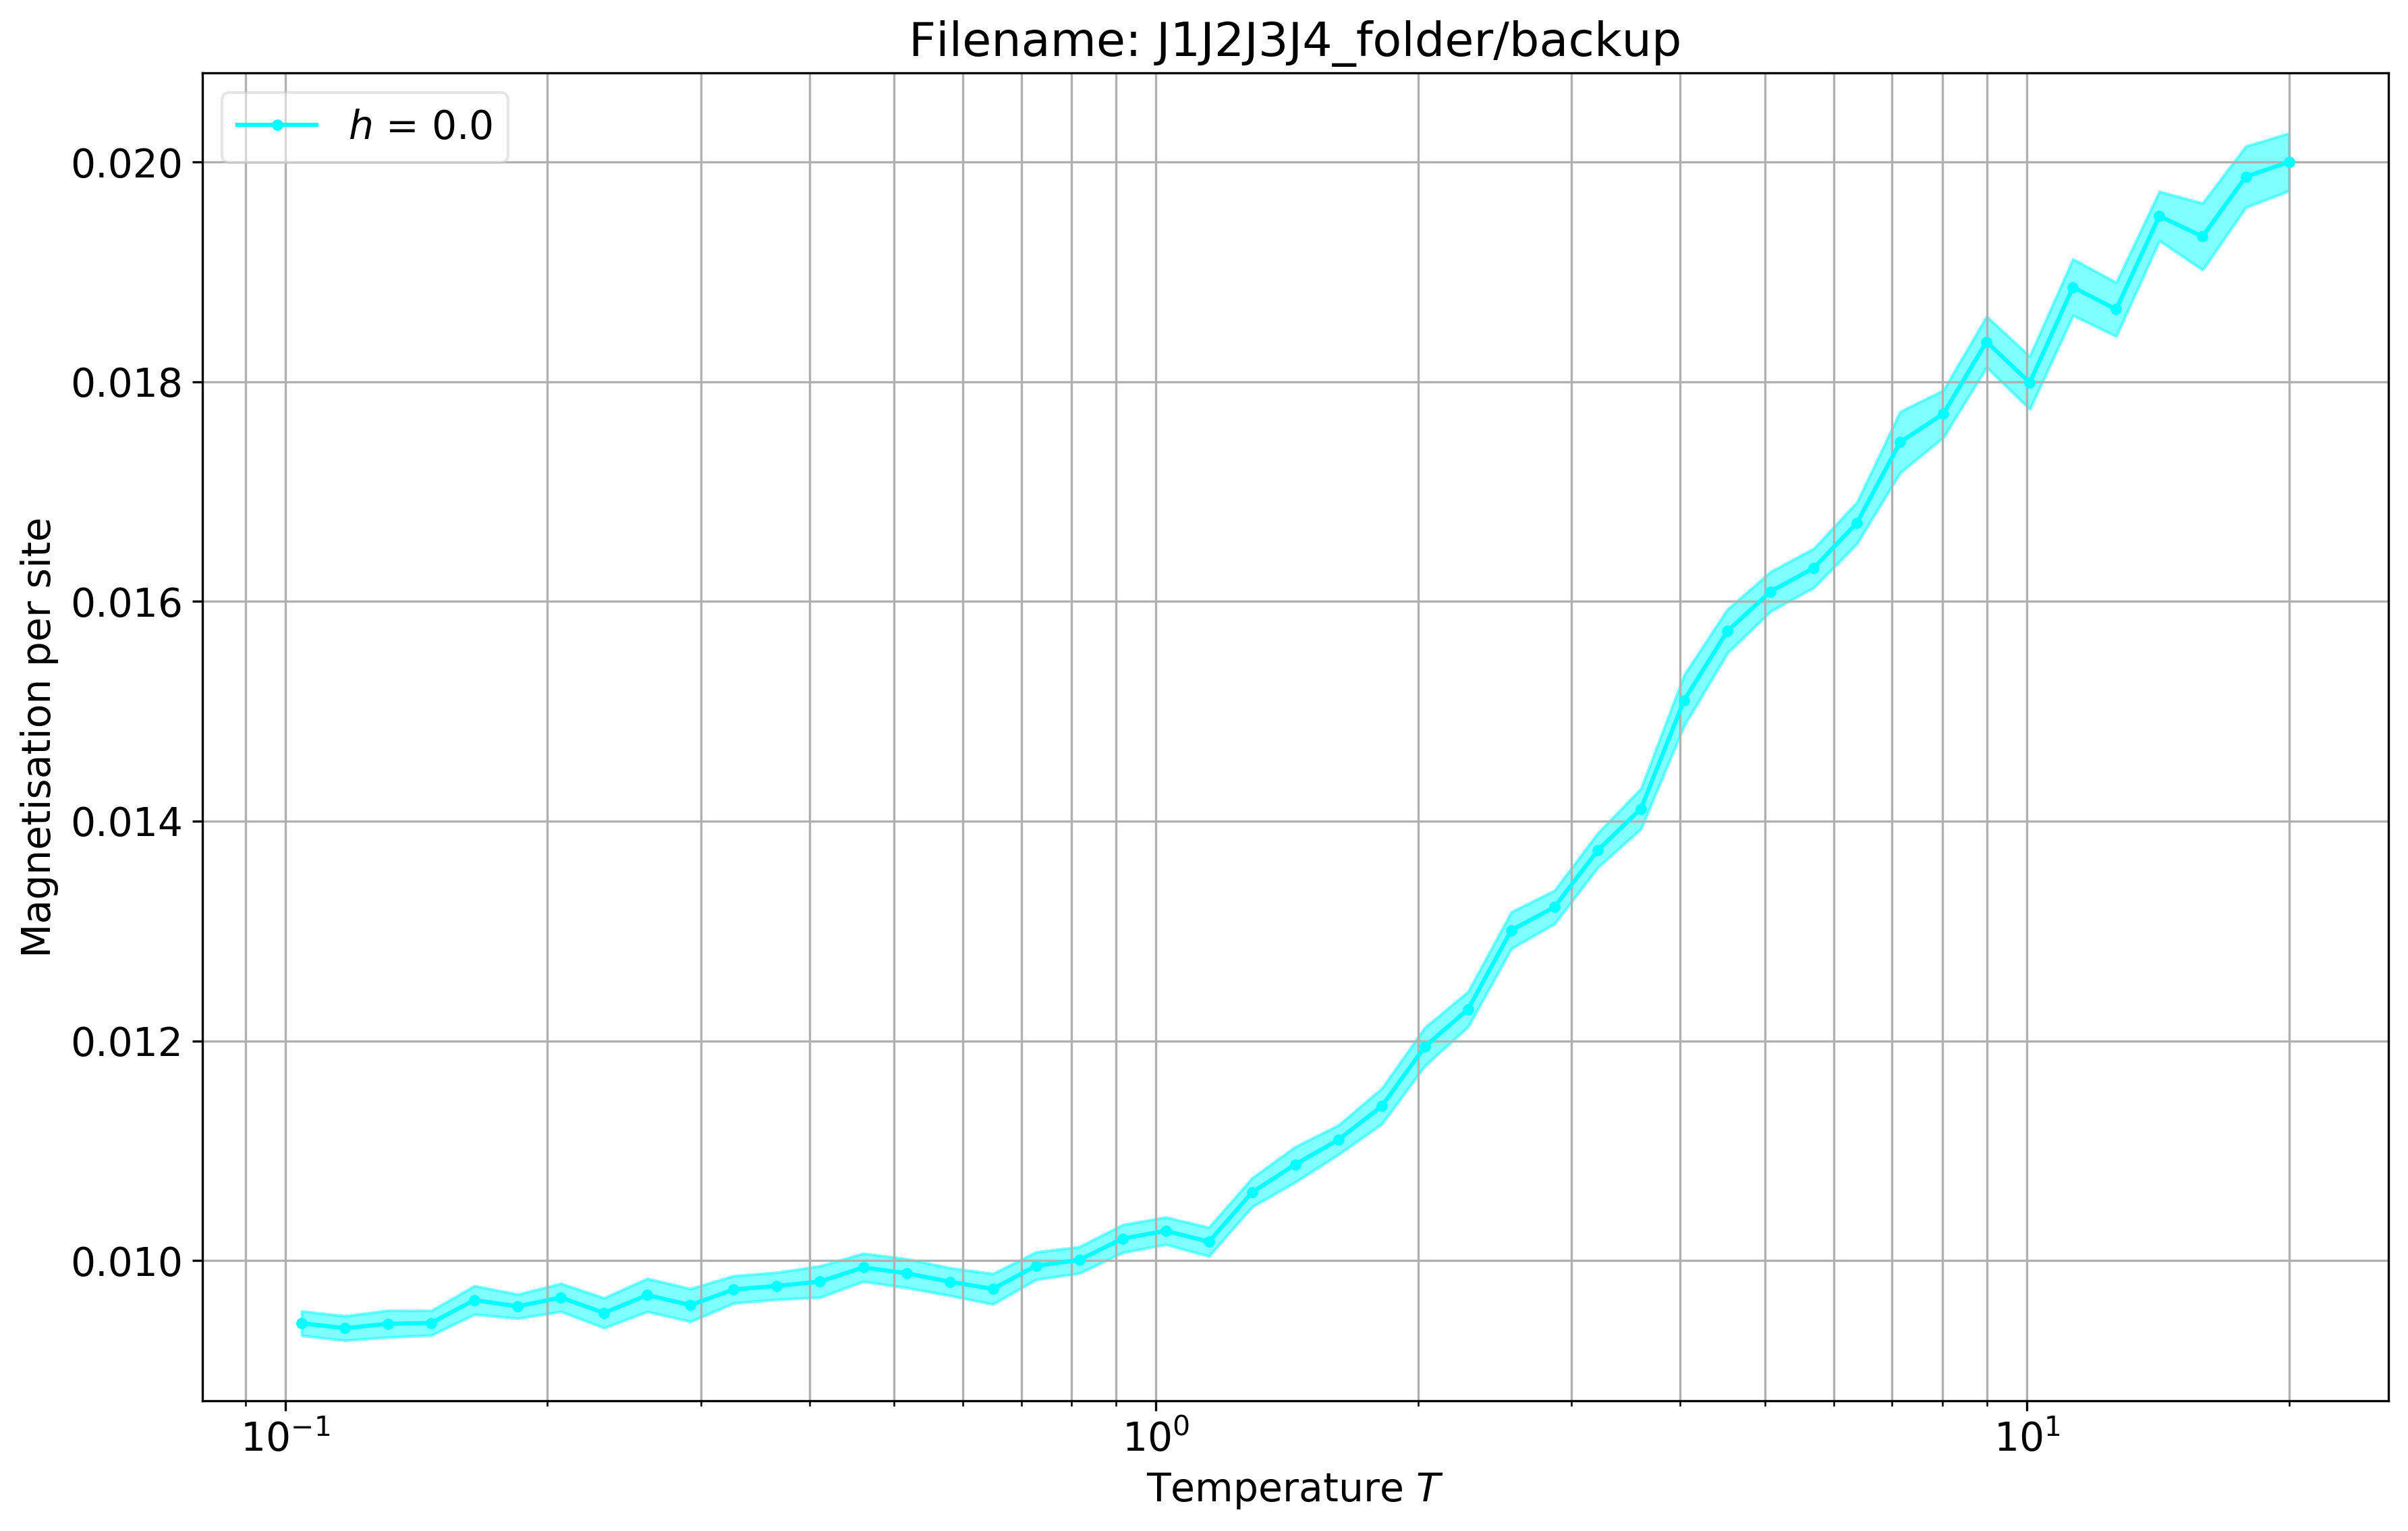

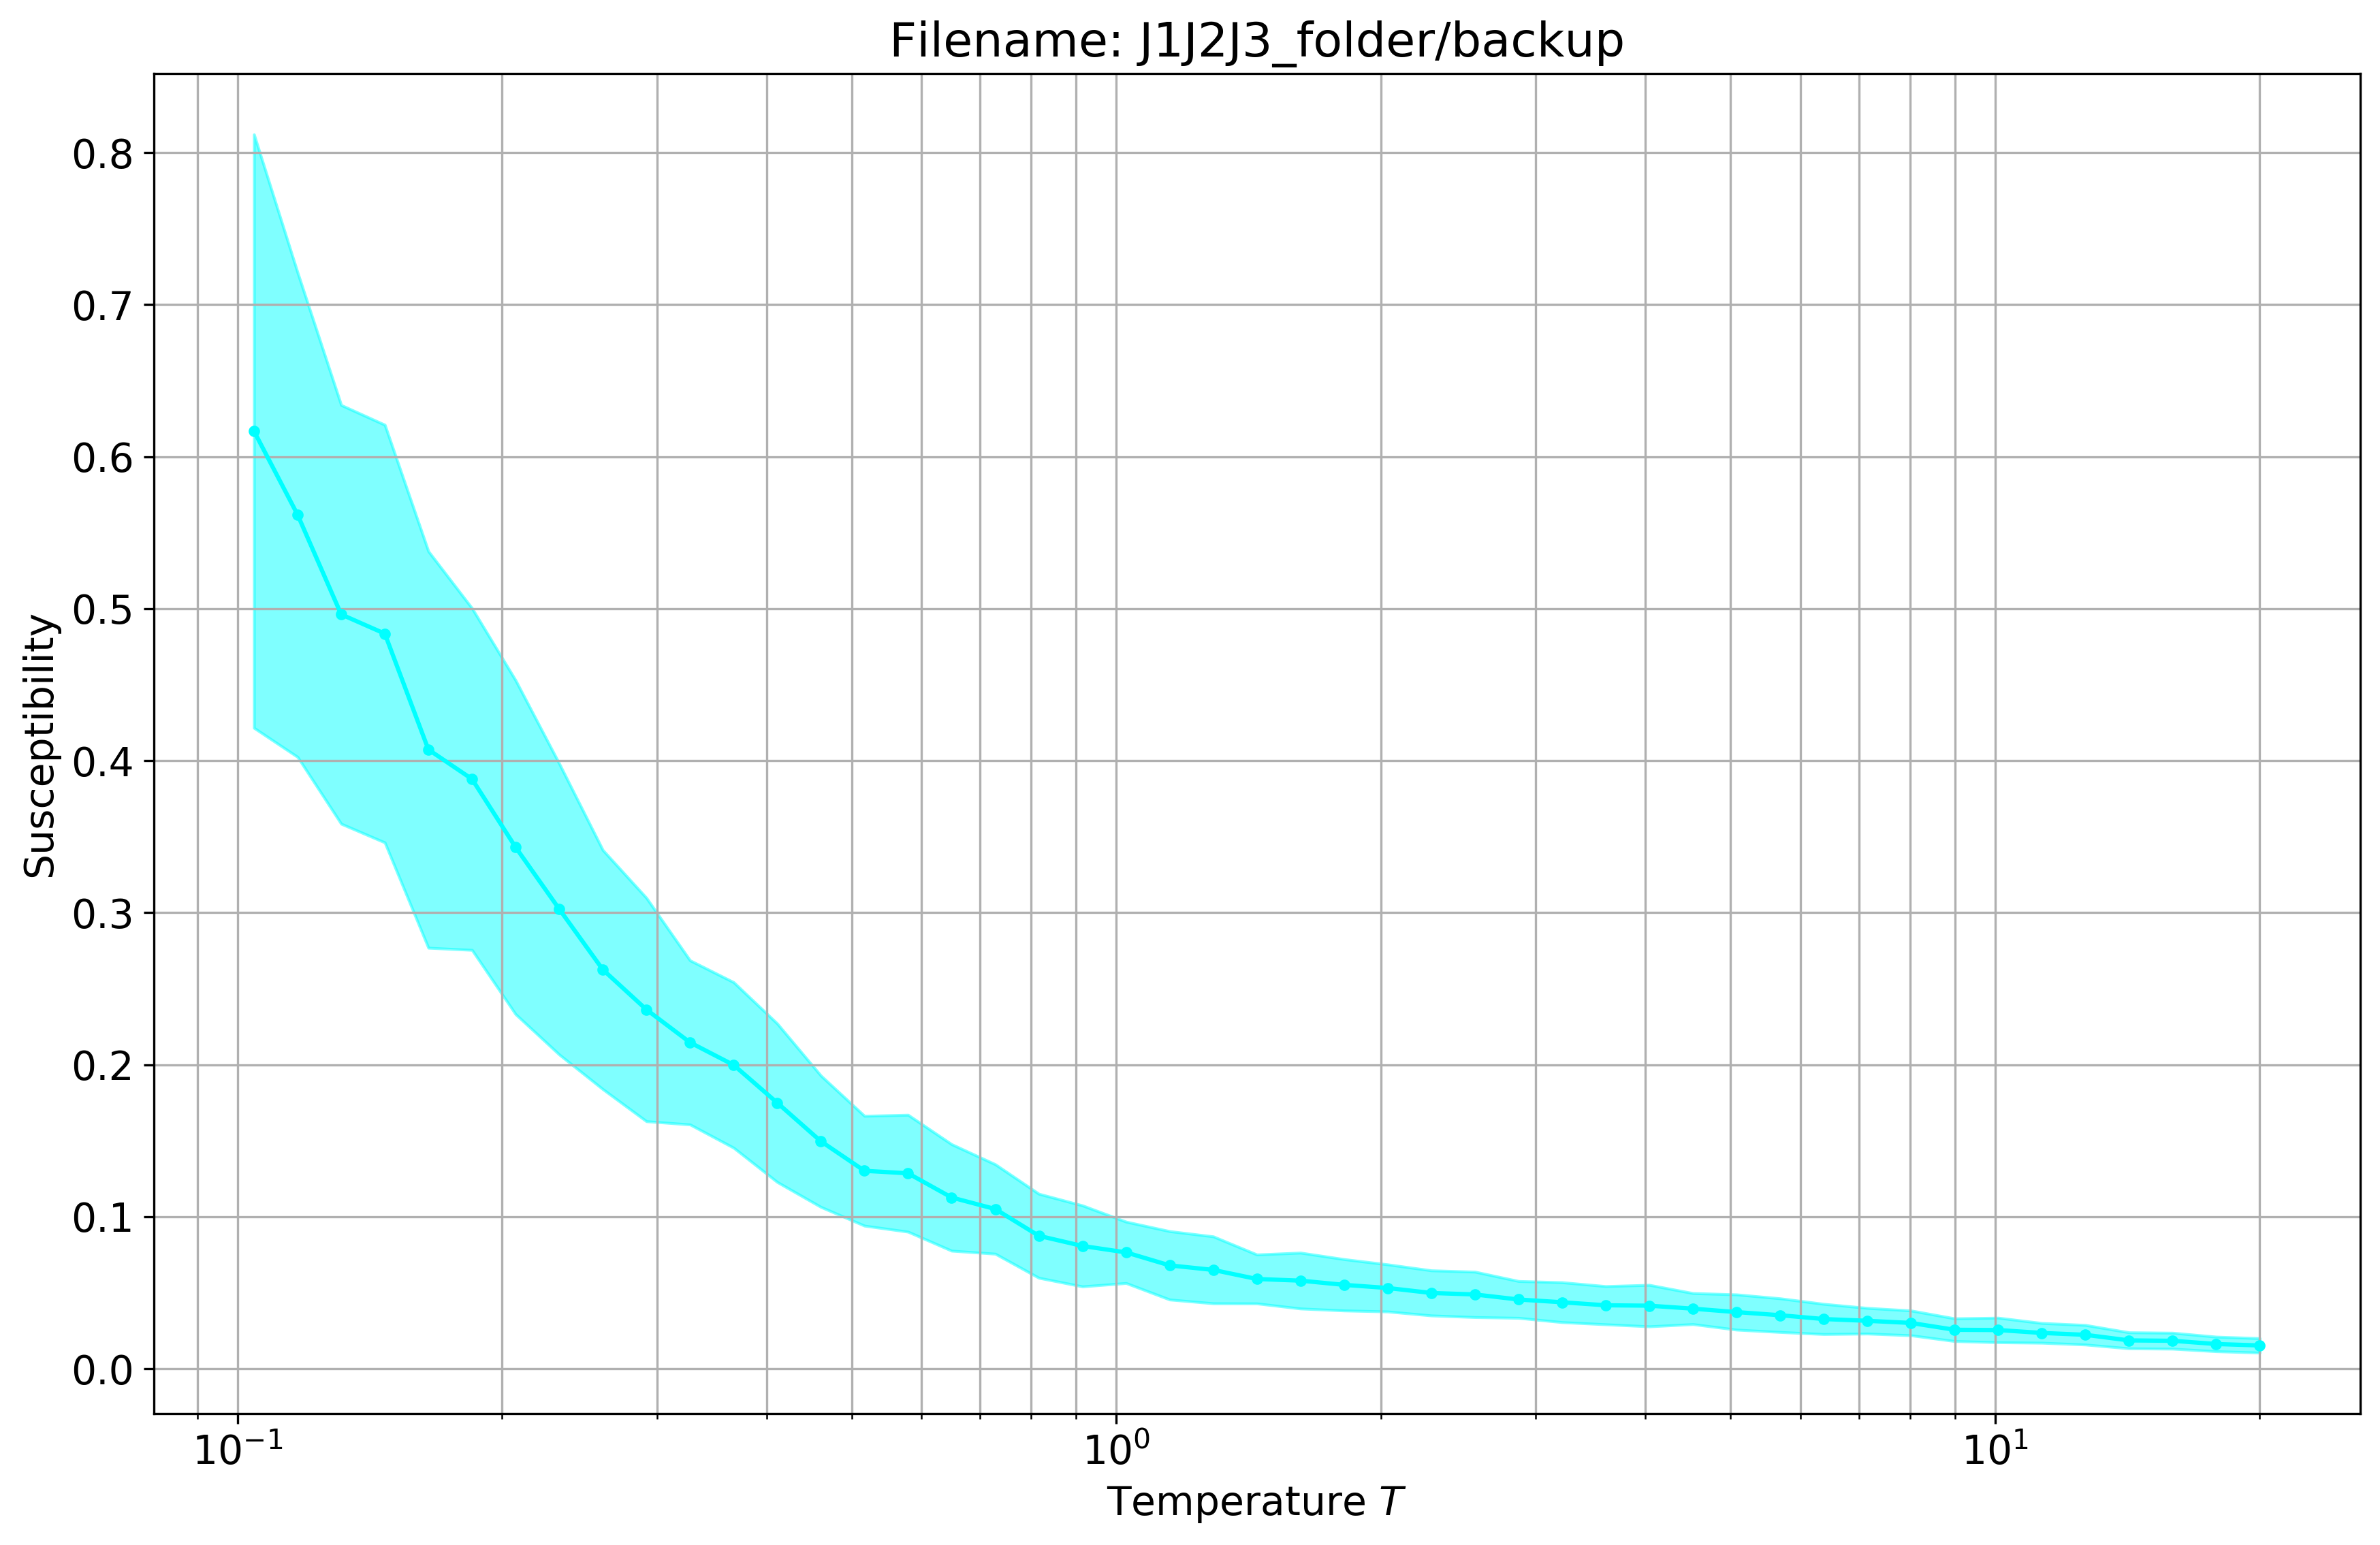

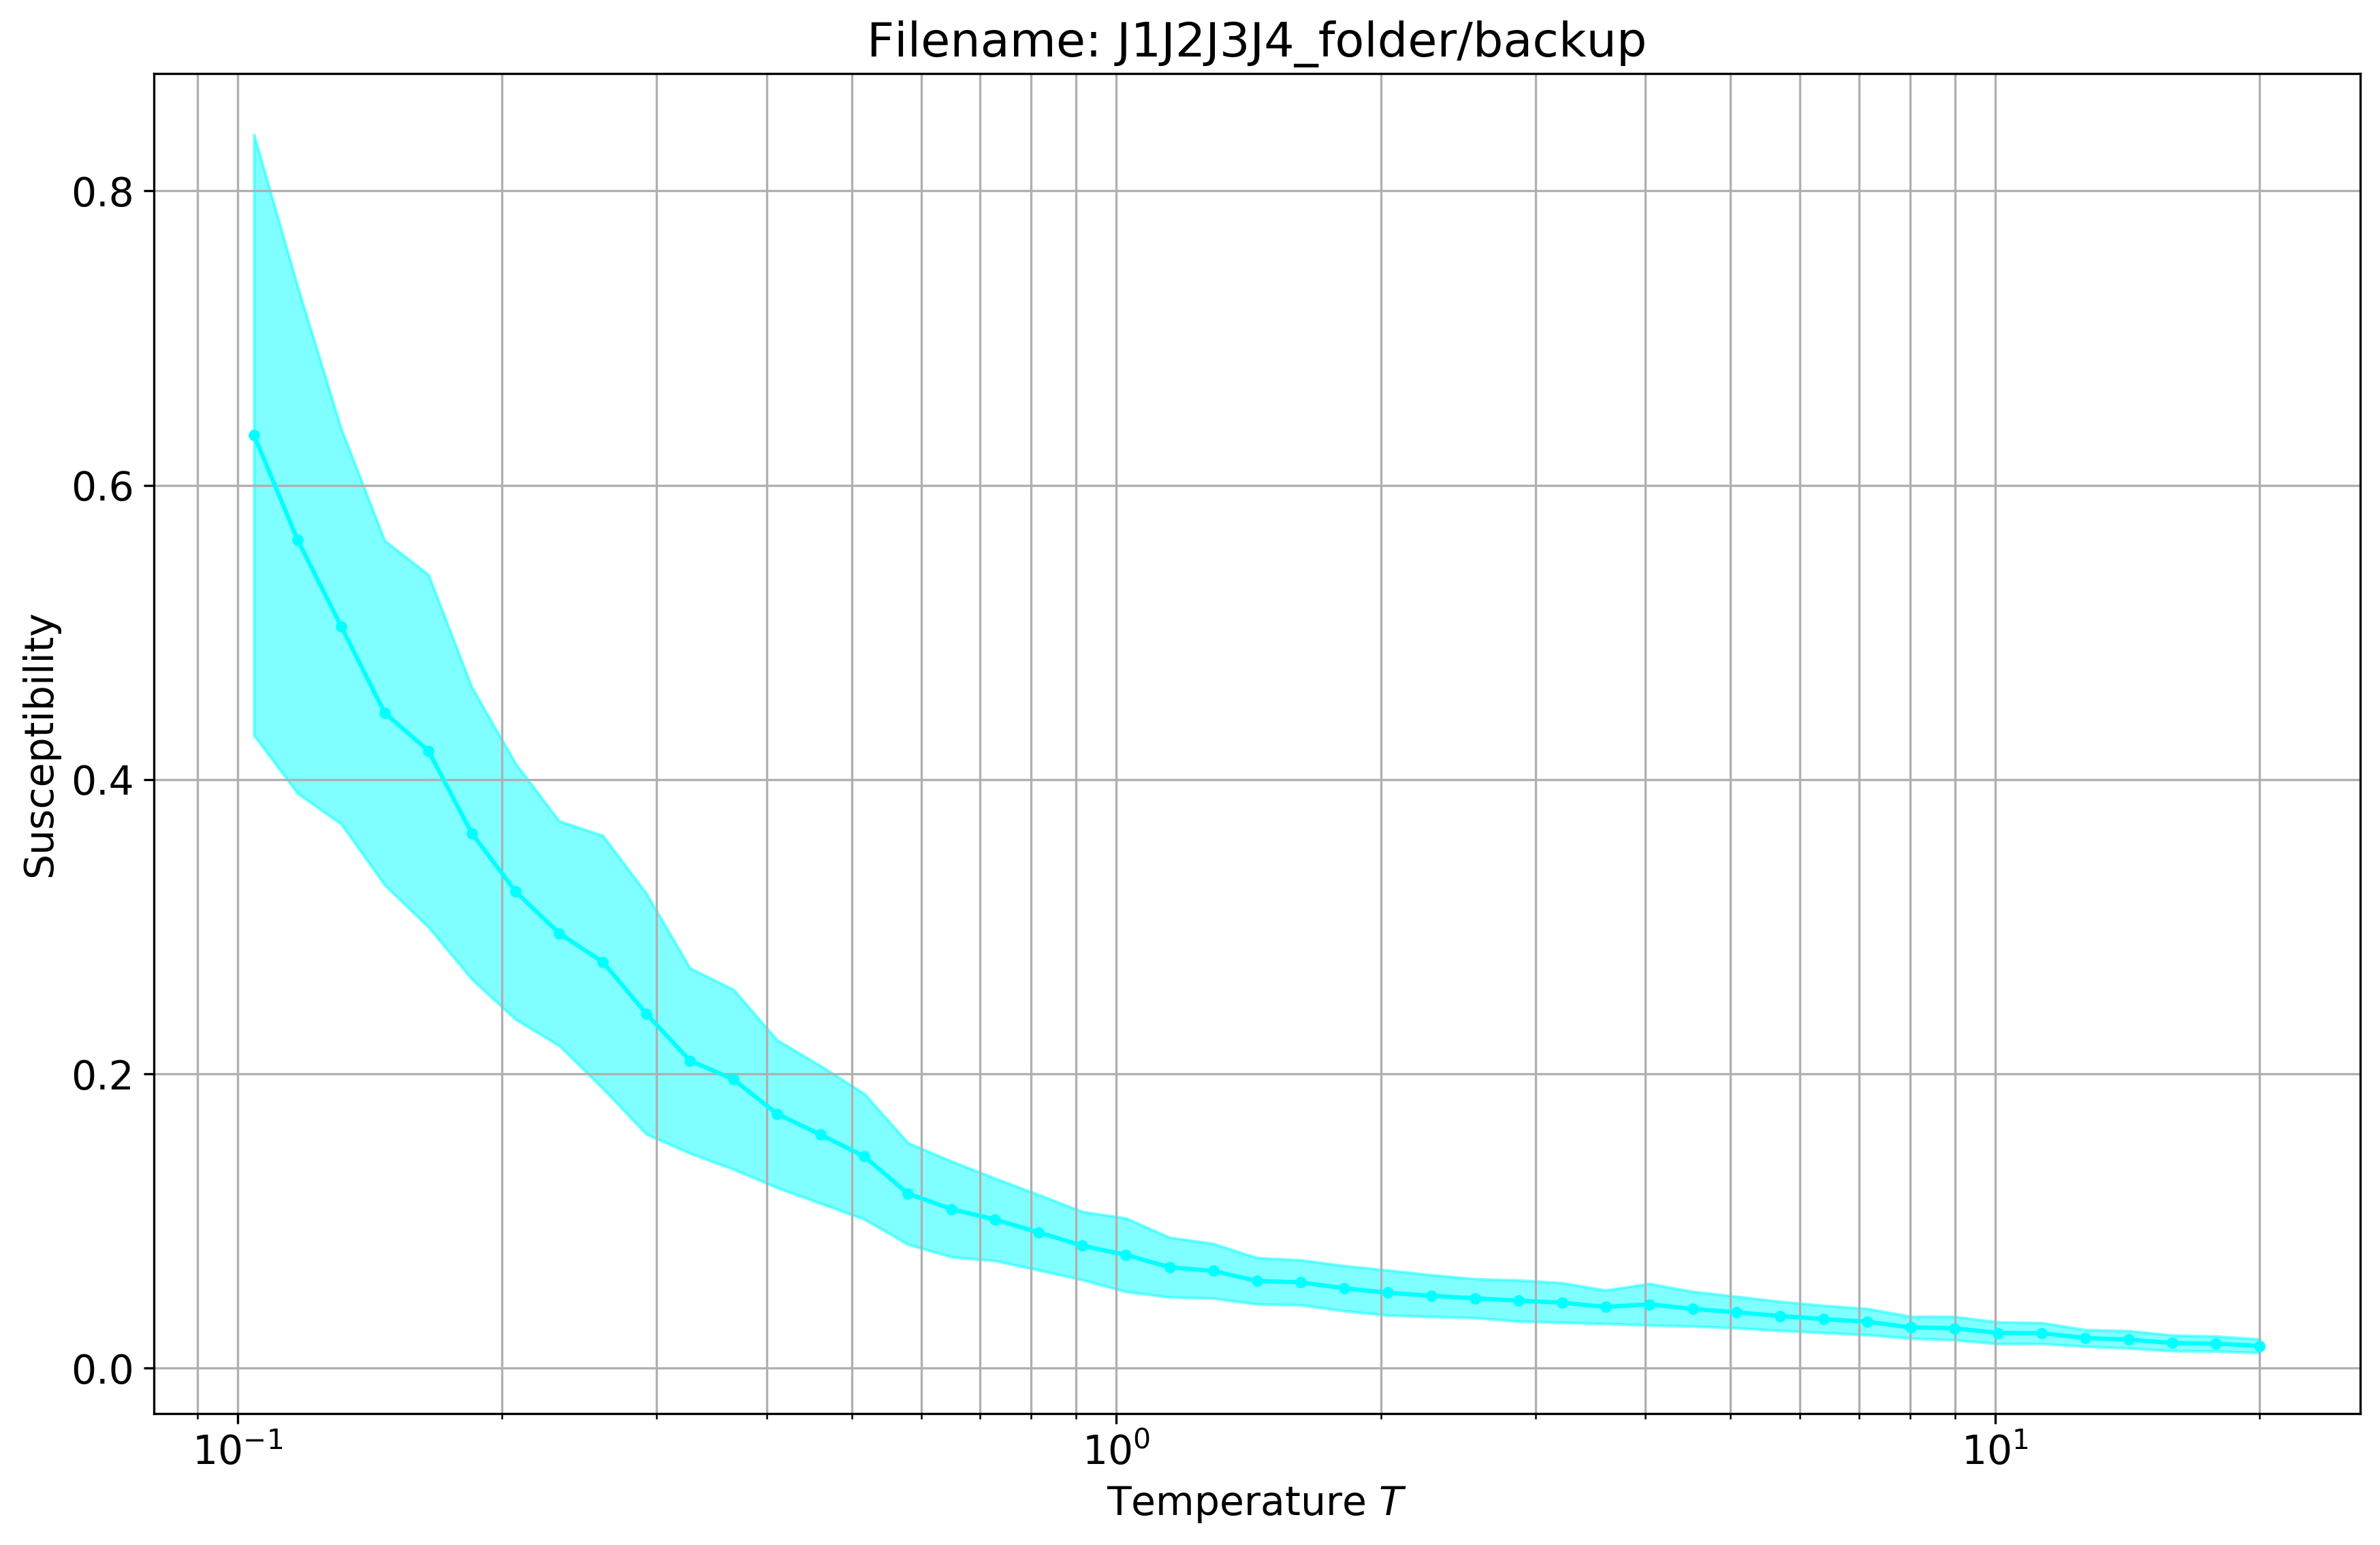

In [11]:
############################################
#        ## MAGNETISATION ANALYSIS ##
############################################
af.BasicPlotsM(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
                t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
plt.show()

In [12]:
rmmag = True
kw = {'rmmag':rmmag,'binning': True, 'plzplot':False}

In [13]:
t_h_MeanFc, t_h_varMeanFc, t_h_MeanSi, t_h_varMeanSi= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps,
                          stat_hfields, nb,t_h_varMeanMsq, **kw)

Binning...Si
 bins list for binning:  [128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [128, 64, 32, 16]
[8.94625523e-34 1.08794516e-07 1.06332377e-07 2.24960895e-07]
(47, 1, 4)
(47, 1, 1296)
Binning...Si
 bins list for binning:  [128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [128, 64, 32, 16]
[8.94625523e-34 2.07237958e-07 1.61271102e-07 3.95206647e-07]
(47, 1, 4)
(47, 1, 1296)


In [14]:
t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
 af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, stat_hfields, nb, **kw)
print(t_h_errCorrEstim[0].shape)

Binning...Si
 bins list for binning:  [128, 64, 32, 16]
Binning...Central_Correlations
 bins list for binning:  [128, 64, 32, 16]
Binning...Si
 bins list for binning:  [128, 64, 32, 16]
Binning...Central_Correlations
 bins list for binning:  [128, 64, 32, 16]
(3, 47, 1, 1296)


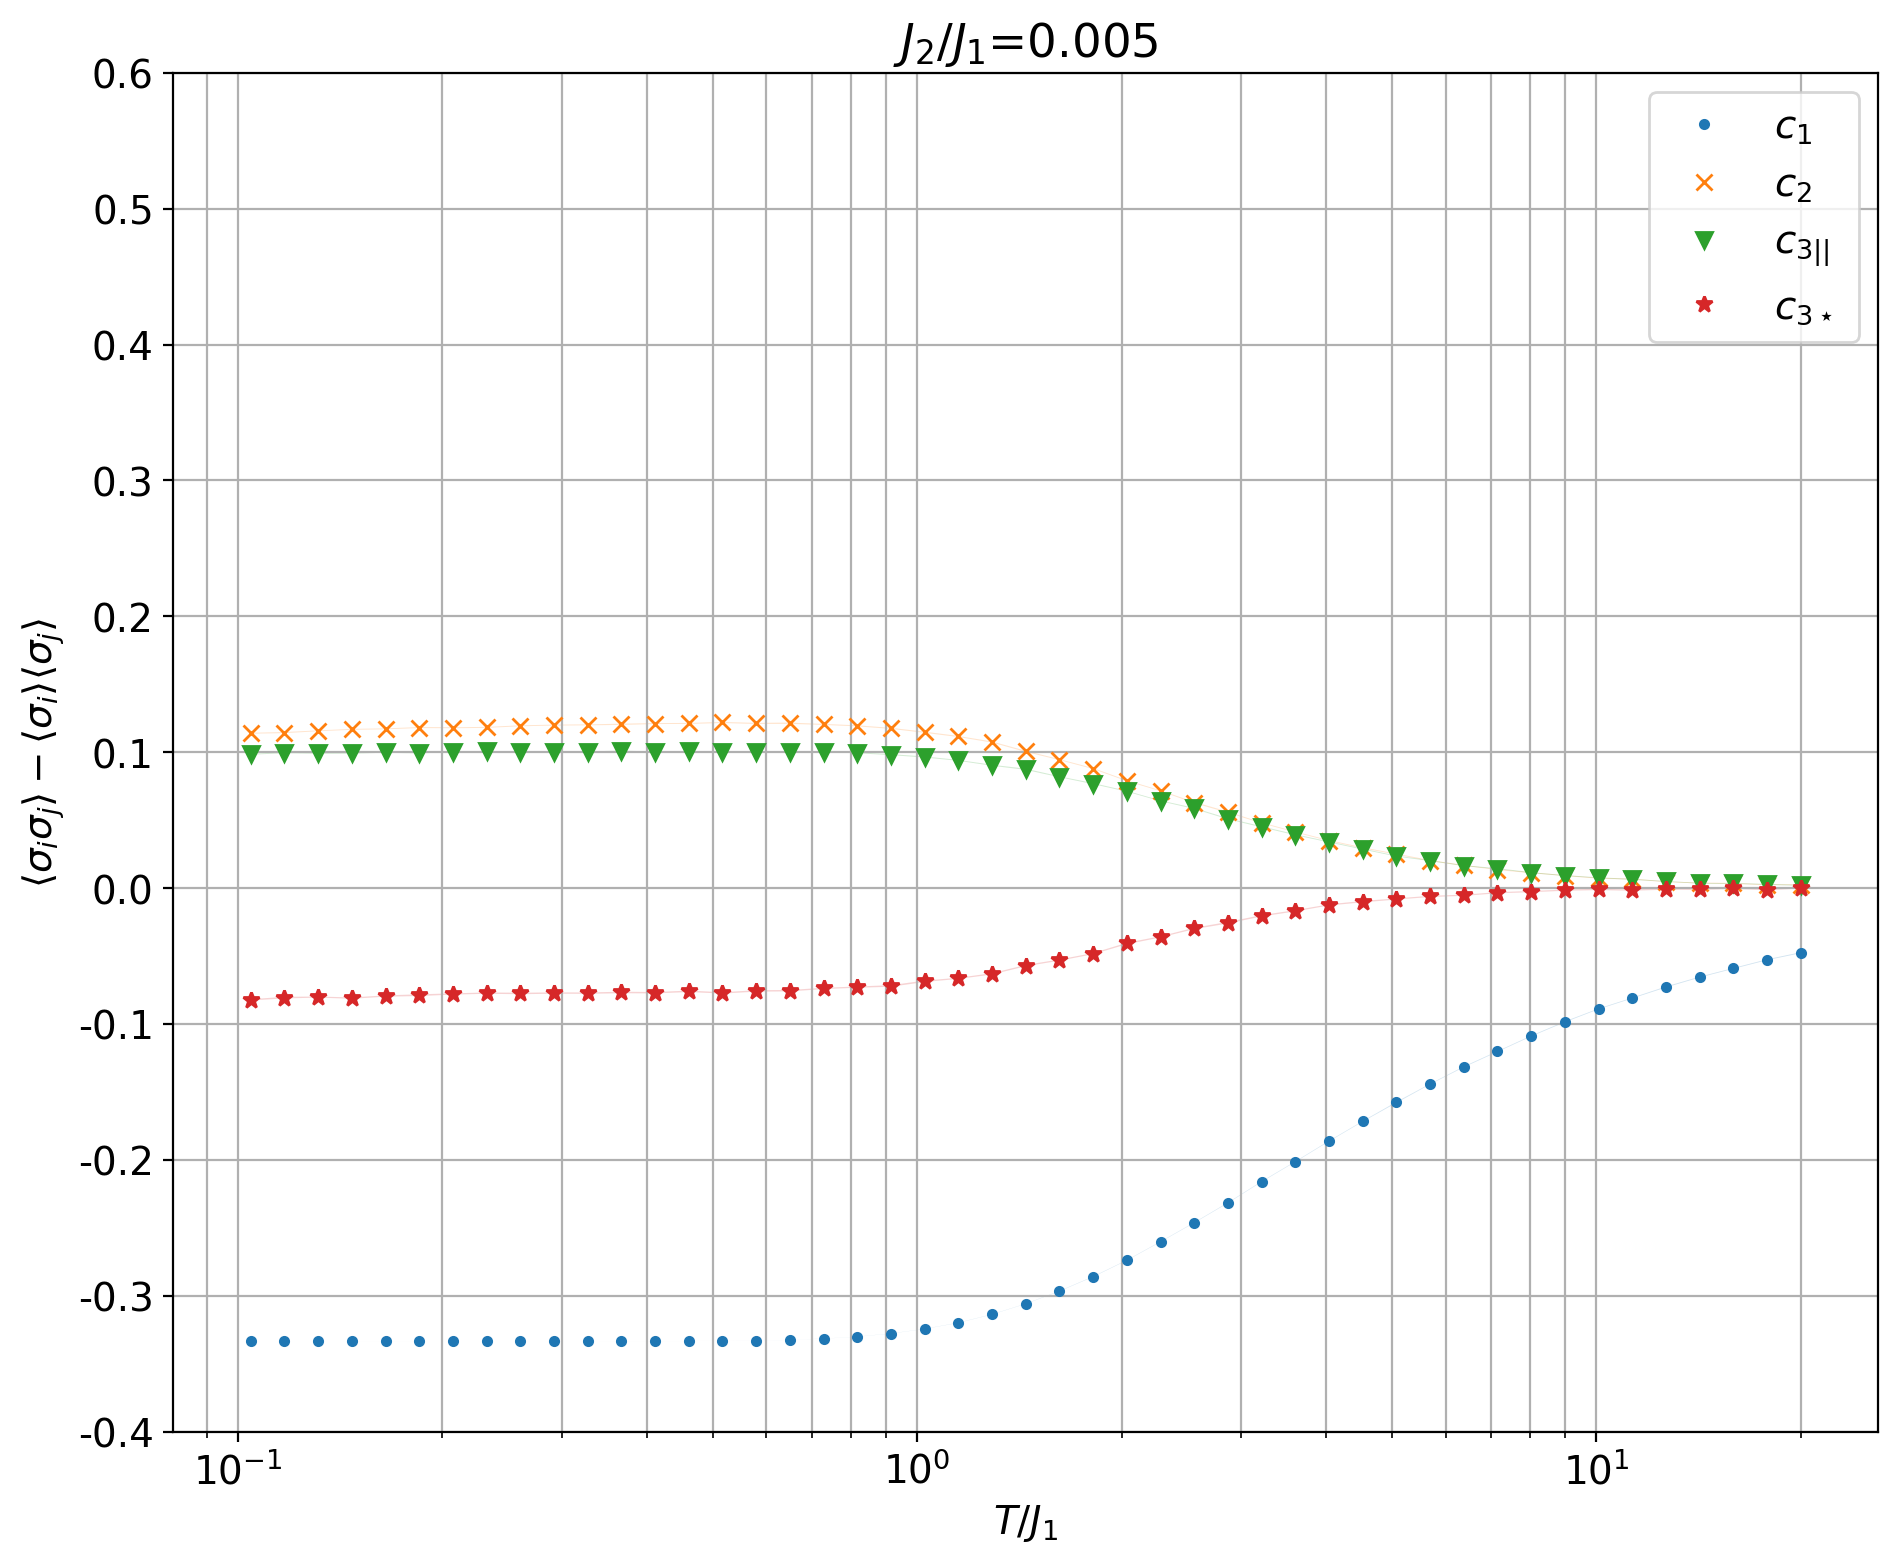

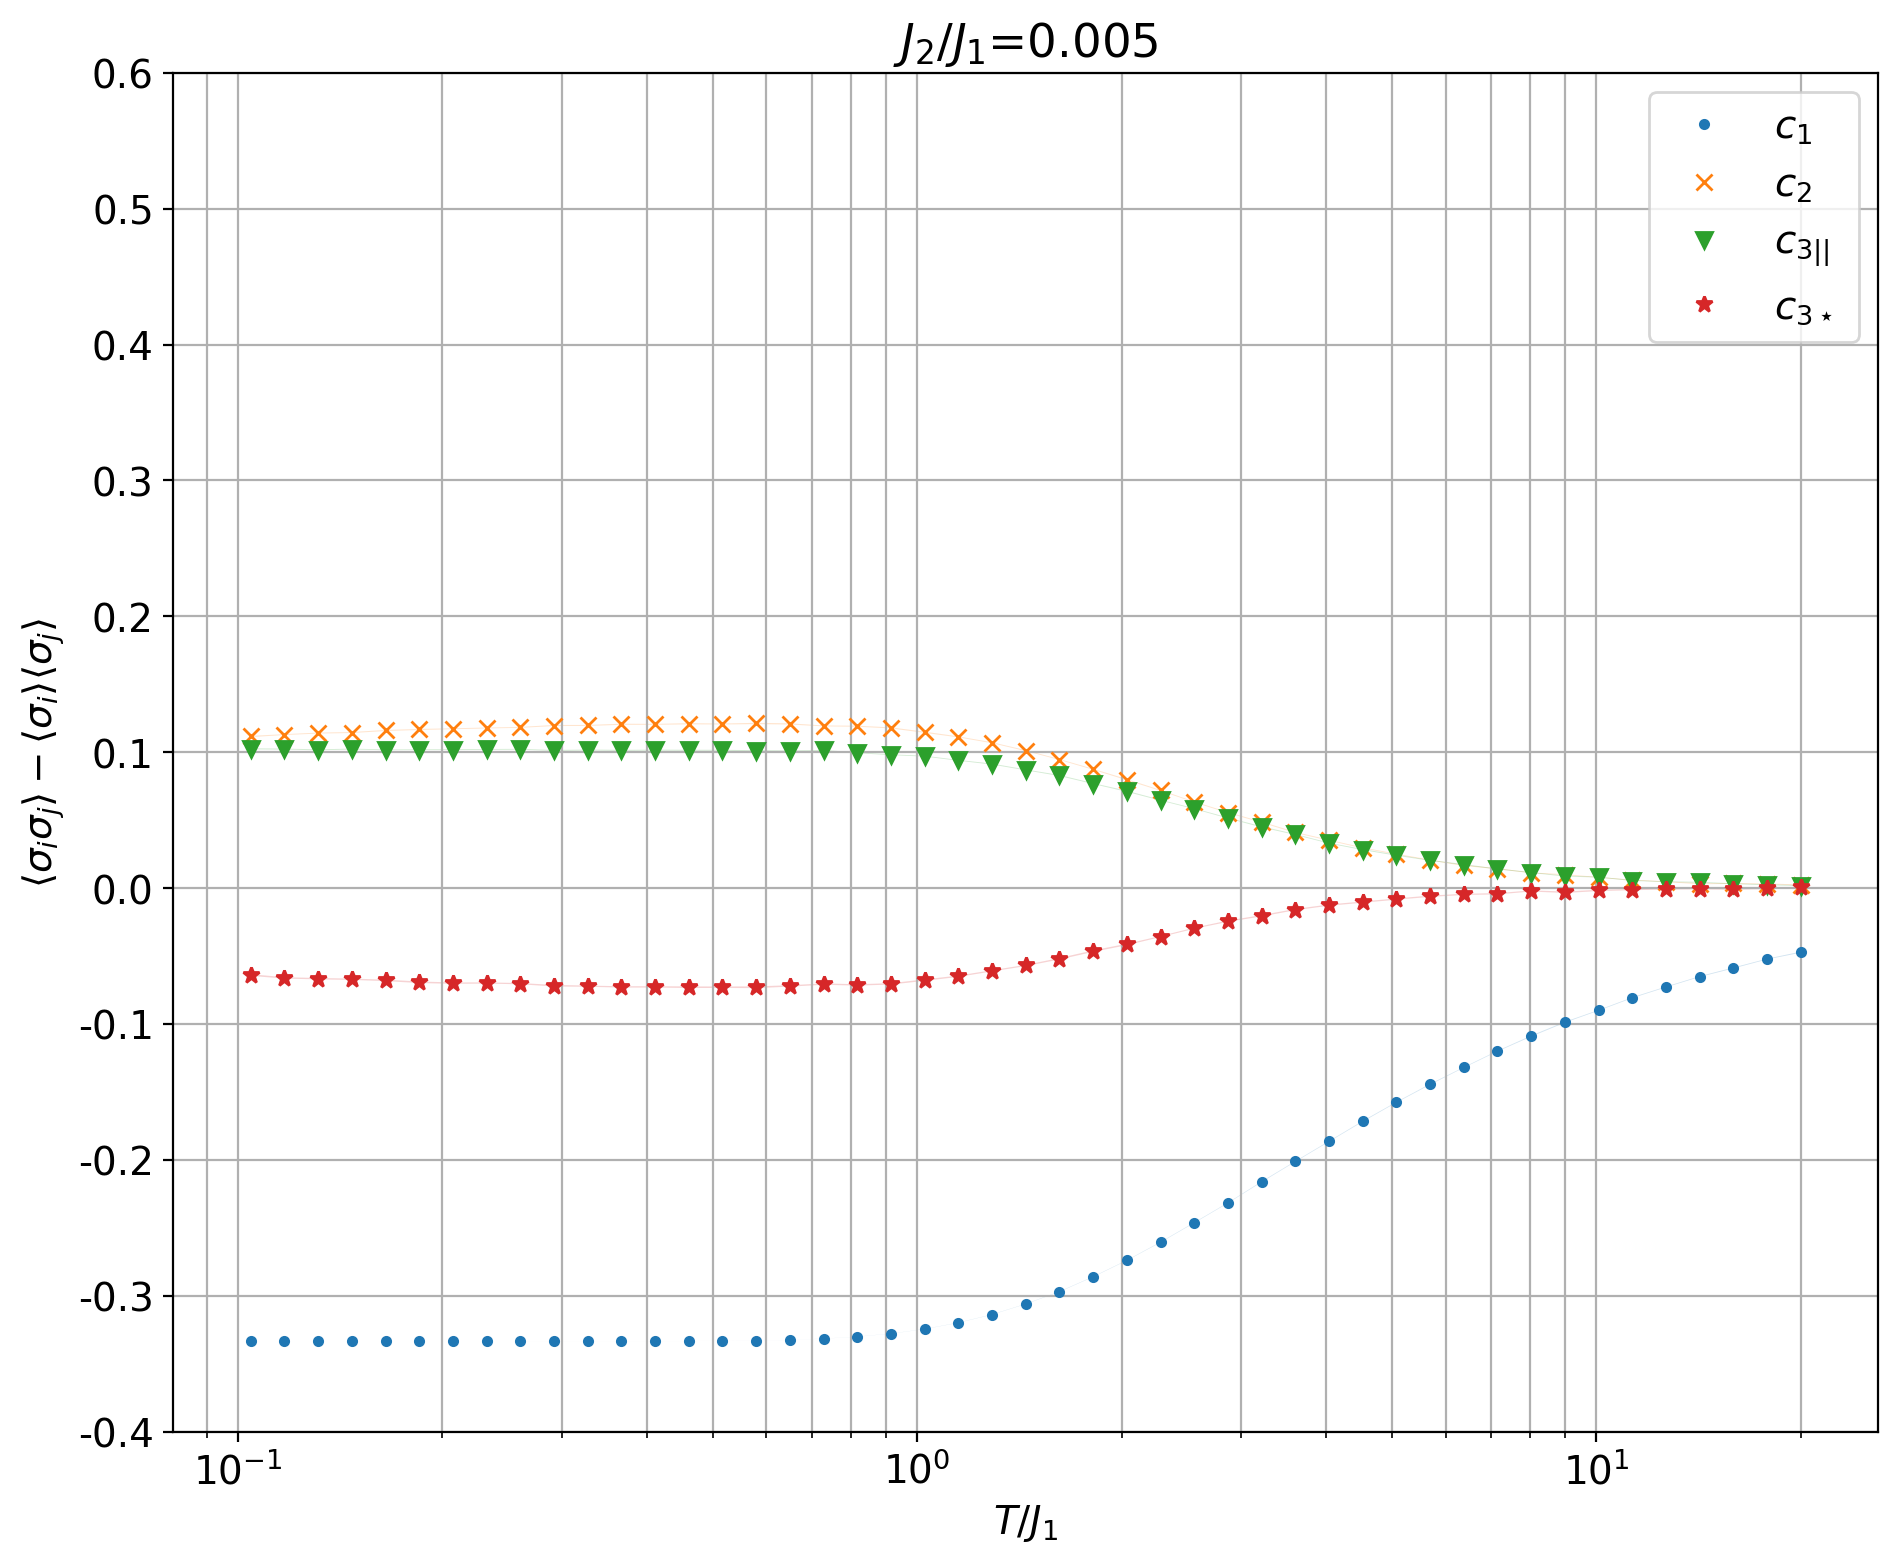

In [15]:
for i in range(n):
    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle)

In [16]:
# Introducing the experimental values for the plots below:
## <sisj>-<si><sj>:
NN1exp = -0.22;
NN1experr = 0.0097;
NN2exp = 0.021;
NN2experr = 0.009;
NN3pexp = 0.065;
NN3pexperr = 0.012;
NN3sexp = -0.001;
NN3sexperr = 0.011;

mexp = -0.193;

rmexpmag = True

if not rmexpmag:
    NN1exp += mexp**2;
    NN2exp += mexp**2;
    NN3pexp += mexp**2;
    NN3sexp += mexp**2;
    

print(NN1exp)
print(NN2exp)
print(NN3pexp)
print(NN3sexp)

-0.22
0.021
0.065
-0.001


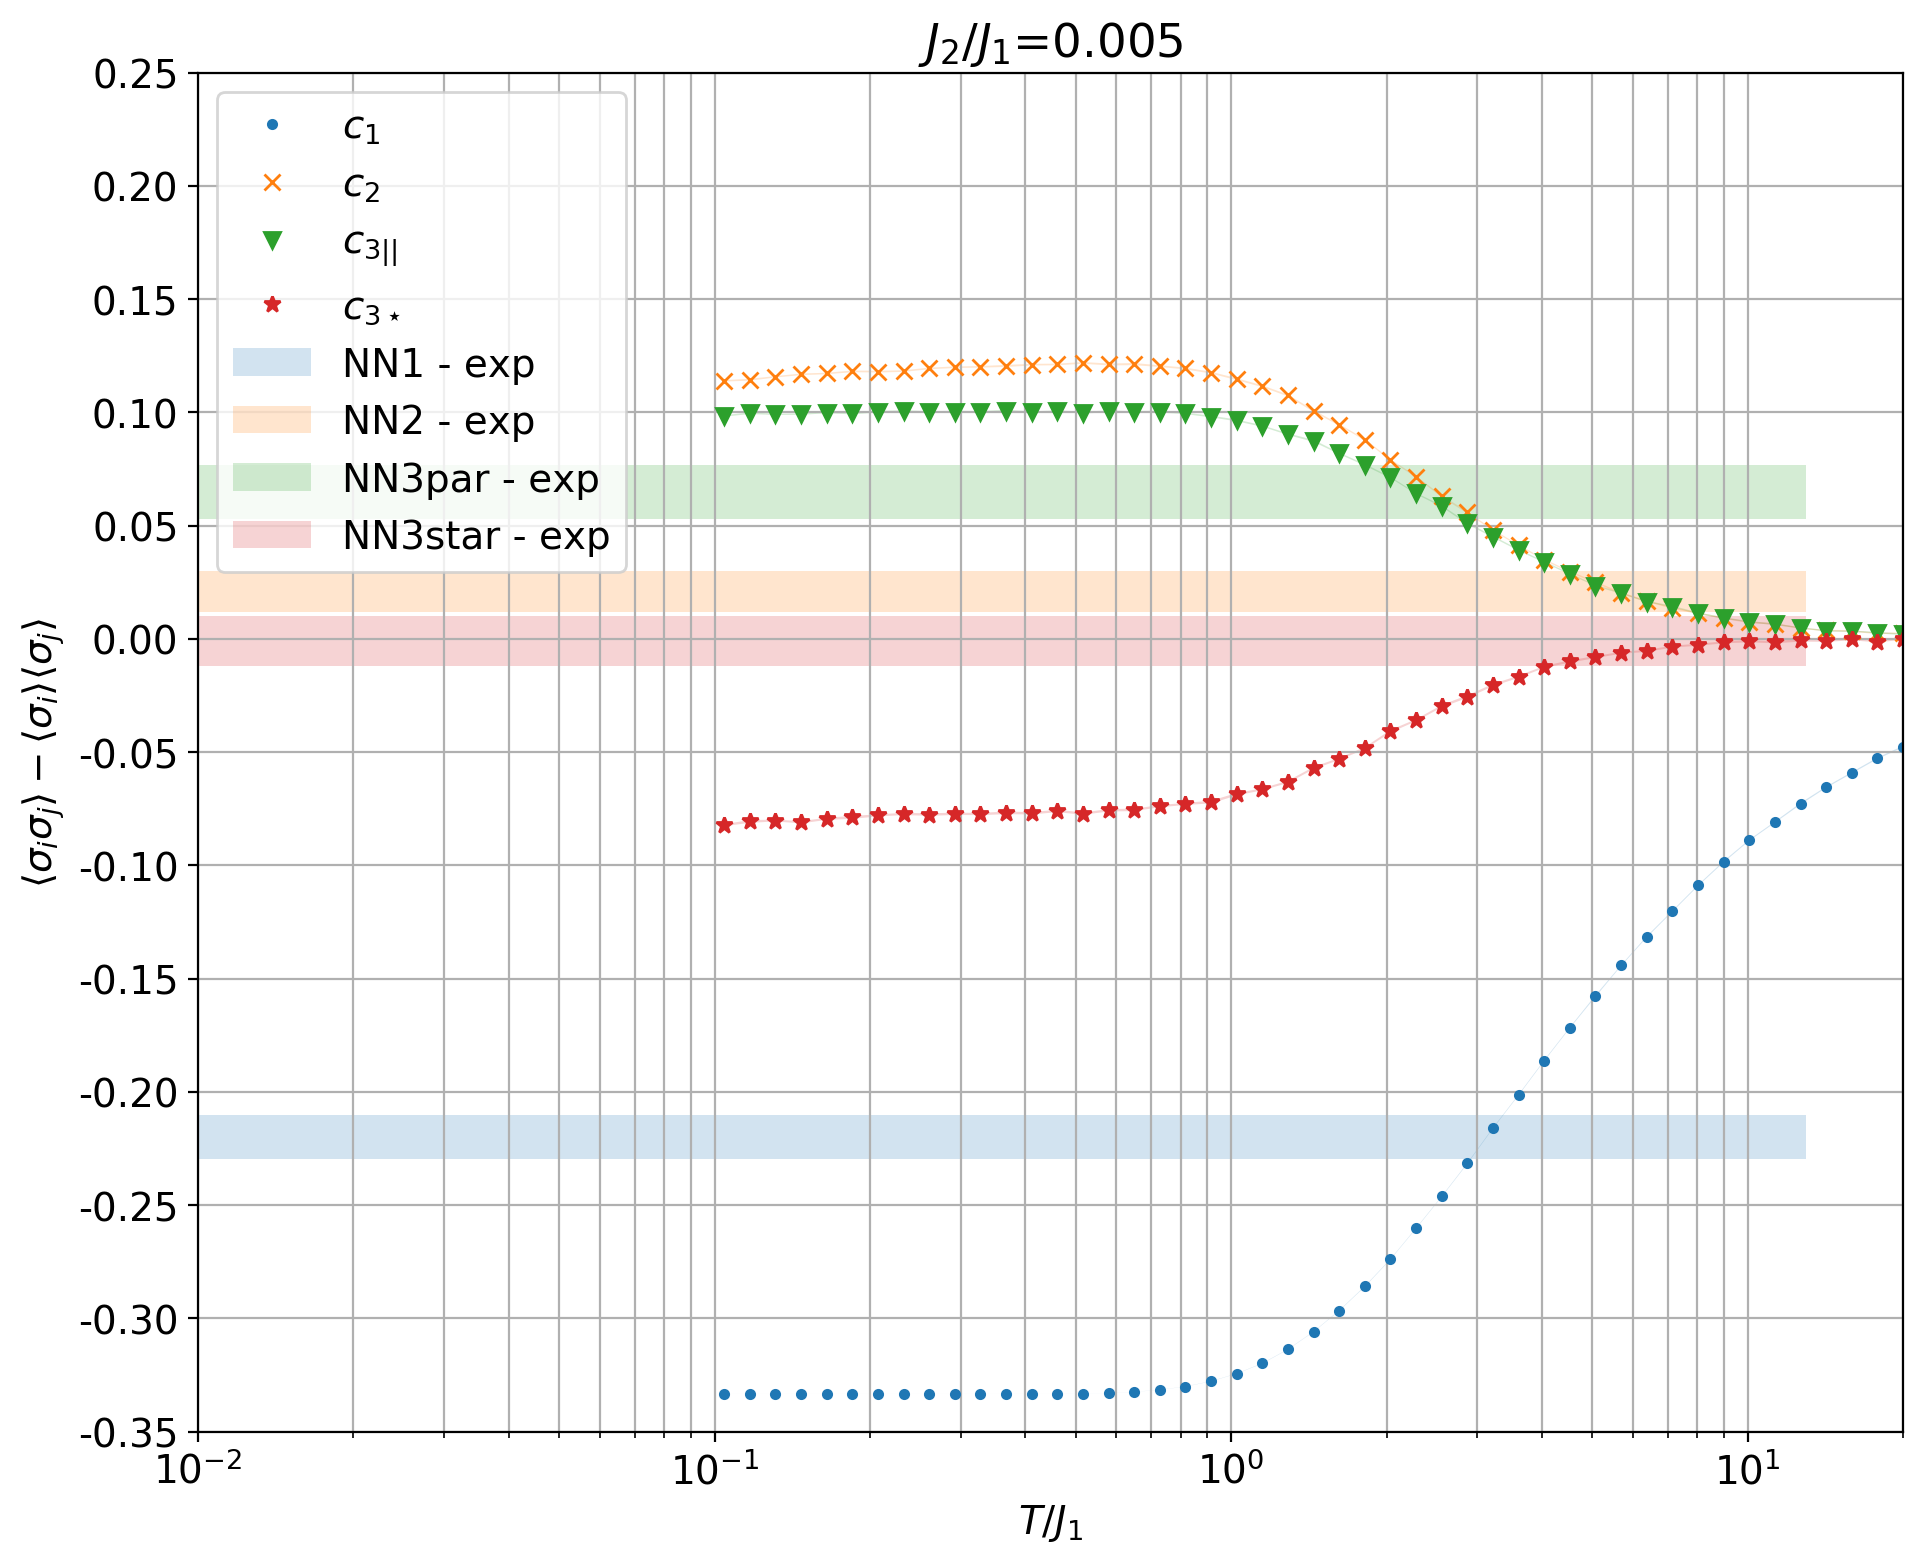

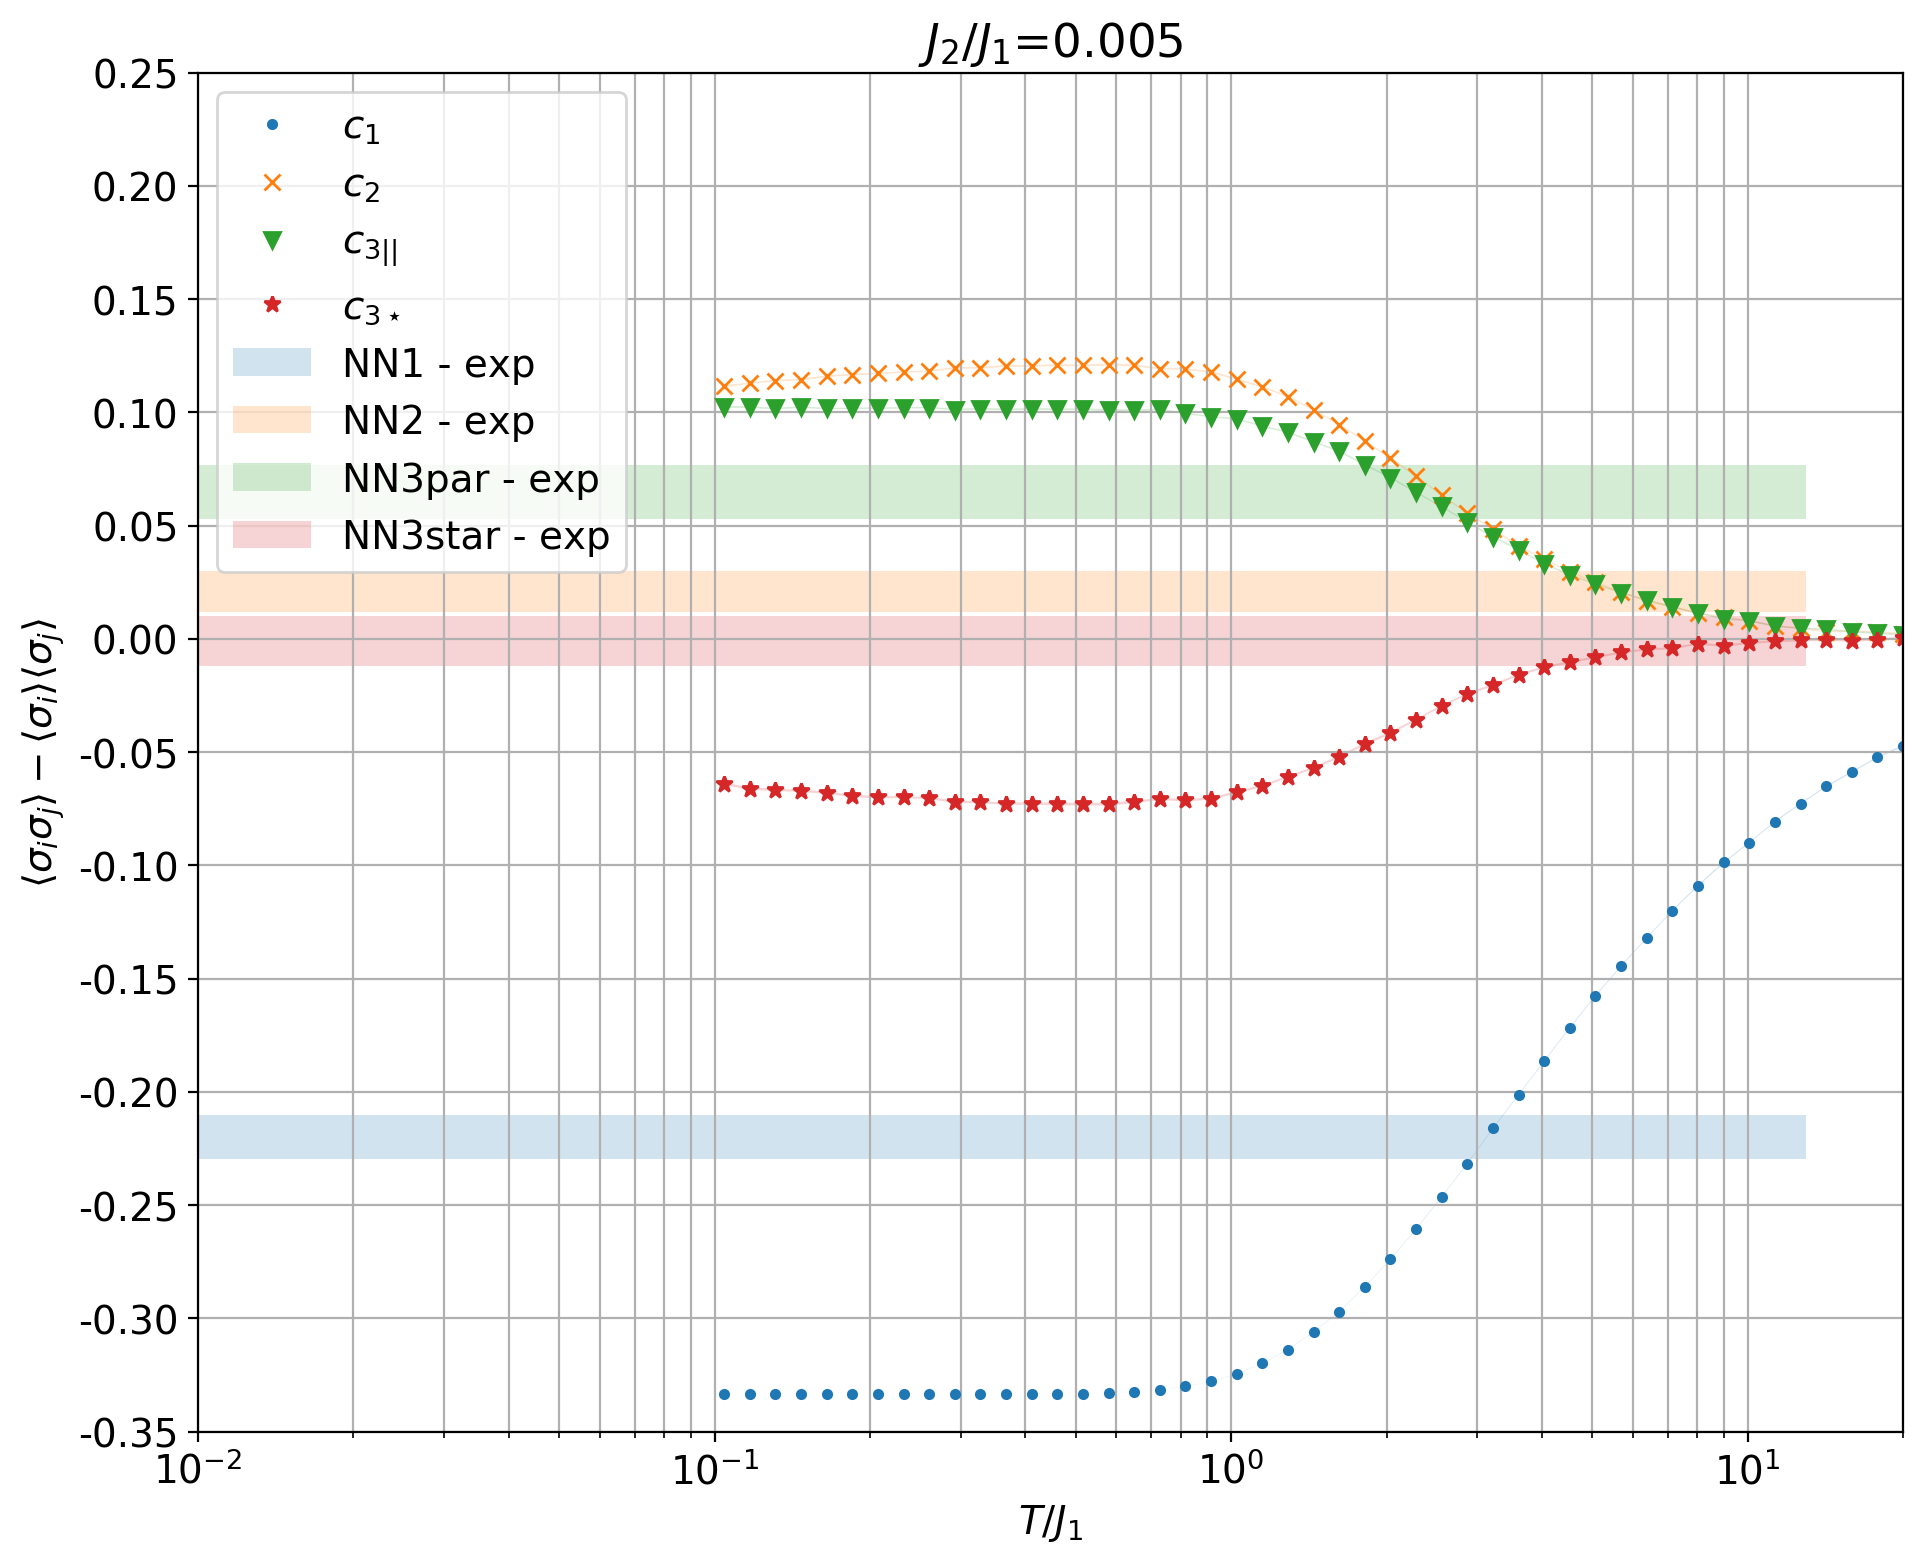

In [17]:
for i in range(n):
    addsave = "J2ovJ1" +"={:4f}".format(J2[i]/J1[i])
    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                   addtitle = addtitle,
                                   save = False)
    plt.gca().set_prop_cycle(None)
    plt.fill_between([1e-3,13],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = 'NN1 - exp')
    plt.fill_between([1e-3,13],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = 'NN2 - exp')
    plt.fill_between([1e-3,13],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = 'NN3par - exp')
    plt.fill_between([1e-3,13],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = 'NN3star - exp')
    plt.xlim([0.01, 20])
    plt.ylim([-0.35, 0.25])
    plt.yticks(np.arange(-0.35,0.3,0.05))
    plt.legend()
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))